| Column        | Description                                                                 |
|---------------|-----------------------------------------------------------------------------|
| `call_id`     | Unique identifier for each call                                             |
| `date`        | Date of the call                                                            |
| `time`        | Time of the call                                                            |
| `priority`    | Call priority level (integer: 0 = high, 1 = regular, 2 = low)               |
| `type`        | Call type code:                                                             |
|               | - `PS`: Regular call activity                                               |
|               | - `NW`: Network-related problem                                             |
|               | - `NE`: New service inquiry                                                 |
|               | - `BS`: Billing service                                                     |
|               | - `ACD`: Overflow or redirect (ACD queue)                                  |
|               | - `INF`: General information                                                |
| `vru_entry`   | Timestamp when caller entered the IVR (Voice Response Unit)                 |
| `vru_exit`    | Timestamp when caller exited the IVR                                        |
| `q_start`     | Time when caller entered the queue                                          |
| `q_exit`      | Time when caller exited the queue (either served or abandoned)              |
| `ser_start`   | Time when agent picked up the call                                          |
| `ser_exit`    | Time when agent completed the service                                       |
| `outcome`     | Call outcome:                                                               |
|               | - `AGENT`: Successfully served by an agent                                  |
|               | - `HANG`: Caller hung up before being served                                |
|               | - `PHANTOM`: No server (agent) available to handle the call                  |
| `server`      | ID of the server/agent who handled the call                                 |



## Data Loading and Preprocessing 

In [1]:
import pandas as pd
import numpy as np

# Load the data set
file_path = 'July1999.txt'
df = pd.read_csv(file_path, sep=r'\s+', na_values='-')

display(df)

df.to_csv("july1999.csv", index=False)
print("Completed preprocessing and saved as 'july1999.csv'")



,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server
0,AA0101,41886,0,0,PS,990701,0:26:17,0:26:27,10,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER
1,AA0101,41887,0,0,NW,990701,6:58:10,6:58:20,10,6:58:20,6:59:08,48,AGENT,6:59:07,6:59:15,8,MORIAH
2,AA0101,41888,0,0,PS,990701,7:30:27,7:30:35,8,0:00:00,0:00:00,0,AGENT,7:30:35,7:34:16,221,MORIAH
3,AA0101,41889,22800312,2,PS,990701,7:49:32,7:49:37,5,7:49:37,7:50:27,50,AGENT,7:50:26,7:51:48,82,ANAT
4,AA0101,41890,0,0,PS,990701,8:03:56,8:04:08,12,0:00:00,0:00:00,0,AGENT,8:04:07,8:05:25,78,KAZAV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39017,AA0216,7893,0,0,IN,990731,16:52:51,16:53:14,23,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER
39018,AA0216,7894,0,0,IN,990731,21:47:47,21:48:11,24,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER
39019,AA0216,7895,0,0,IN,990731,22:09:48,22:10:07,19,0:00:00,0:00:00,0,AGENT,22:10:06,22:11:46,100,AVI
39020,AA0216,7896,0,0,IN,990731,22:46:05,22:46:14,9,22:46:14,22:48:40,146,AGENT,22:48:39,22:49:45,66,AVI


Completed preprocessing and saved as 'july1999.csv'


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39022 entries, 0 to 39021
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   vru+line     39022 non-null  object
 1   call_id      39022 non-null  int64 
 2   customer_id  39022 non-null  int64 
 3   priority     39022 non-null  int64 
 4   type         39022 non-null  object
 5   date         39022 non-null  int64 
 6   vru_entry    39022 non-null  object
 7   vru_exit     39022 non-null  object
 8   vru_time     39022 non-null  int64 
 9   q_start      39022 non-null  object
 10  q_exit       39022 non-null  object
 11  q_time       39022 non-null  int64 
 12  outcome      39022 non-null  object
 13  ser_start    39022 non-null  object
 14  ser_exit     39022 non-null  object
 15  ser_time     39022 non-null  int64 
 16  server       39022 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.1+ MB


In [3]:
# First, convert 'date' column from yymmdd to datetime
df['date'] = pd.to_datetime(df['date'], format='%y%m%d', errors='coerce')

# Then combine with time columns (which are already clean HH:MM:SS strings)
time_cols = ['vru_entry', 'vru_exit', 'q_start', 'q_exit', 'ser_start', 'ser_exit']
for col in time_cols:
    df[col] = pd.to_datetime(
        df['date'].dt.strftime('%Y-%m-%d') + ' ' + df[col],
        format='%Y-%m-%d %H:%M:%S',
        errors='coerce'
    )

display(df)

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server
0,AA0101,41886,0,0,PS,1999-07-01,1999-07-01 00:26:17,1999-07-01 00:26:27,10,1999-07-01 00:00:00,1999-07-01 00:00:00,0,HANG,1999-07-01 00:00:00,1999-07-01 00:00:00,0,NO_SERVER
1,AA0101,41887,0,0,NW,1999-07-01,1999-07-01 06:58:10,1999-07-01 06:58:20,10,1999-07-01 06:58:20,1999-07-01 06:59:08,48,AGENT,1999-07-01 06:59:07,1999-07-01 06:59:15,8,MORIAH
2,AA0101,41888,0,0,PS,1999-07-01,1999-07-01 07:30:27,1999-07-01 07:30:35,8,1999-07-01 00:00:00,1999-07-01 00:00:00,0,AGENT,1999-07-01 07:30:35,1999-07-01 07:34:16,221,MORIAH
3,AA0101,41889,22800312,2,PS,1999-07-01,1999-07-01 07:49:32,1999-07-01 07:49:37,5,1999-07-01 07:49:37,1999-07-01 07:50:27,50,AGENT,1999-07-01 07:50:26,1999-07-01 07:51:48,82,ANAT
4,AA0101,41890,0,0,PS,1999-07-01,1999-07-01 08:03:56,1999-07-01 08:04:08,12,1999-07-01 00:00:00,1999-07-01 00:00:00,0,AGENT,1999-07-01 08:04:07,1999-07-01 08:05:25,78,KAZAV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39017,AA0216,7893,0,0,IN,1999-07-31,1999-07-31 16:52:51,1999-07-31 16:53:14,23,1999-07-31 00:00:00,1999-07-31 00:00:00,0,HANG,1999-07-31 00:00:00,1999-07-31 00:00:00,0,NO_SERVER
39018,AA0216,7894,0,0,IN,1999-07-31,1999-07-31 21:47:47,1999-07-31 21:48:11,24,1999-07-31 00:00:00,1999-07-31 00:00:00,0,HANG,1999-07-31 00:00:00,1999-07-31 00:00:00,0,NO_SERVER
39019,AA0216,7895,0,0,IN,1999-07-31,1999-07-31 22:09:48,1999-07-31 22:10:07,19,1999-07-31 00:00:00,1999-07-31 00:00:00,0,AGENT,1999-07-31 22:10:06,1999-07-31 22:11:46,100,AVI
39020,AA0216,7896,0,0,IN,1999-07-31,1999-07-31 22:46:05,1999-07-31 22:46:14,9,1999-07-31 22:46:14,1999-07-31 22:48:40,146,AGENT,1999-07-31 22:48:39,1999-07-31 22:49:45,66,AVI


In [4]:
# Convert the numeric columns to float
numeric_cols = ['vru_time', 'q_time', 'ser_time']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)

display(df)

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server
0,AA0101,41886,0,0,PS,1999-07-01,1999-07-01 00:26:17,1999-07-01 00:26:27,10.0,1999-07-01 00:00:00,1999-07-01 00:00:00,0.0,HANG,1999-07-01 00:00:00,1999-07-01 00:00:00,0.0,NO_SERVER
1,AA0101,41887,0,0,NW,1999-07-01,1999-07-01 06:58:10,1999-07-01 06:58:20,10.0,1999-07-01 06:58:20,1999-07-01 06:59:08,48.0,AGENT,1999-07-01 06:59:07,1999-07-01 06:59:15,8.0,MORIAH
2,AA0101,41888,0,0,PS,1999-07-01,1999-07-01 07:30:27,1999-07-01 07:30:35,8.0,1999-07-01 00:00:00,1999-07-01 00:00:00,0.0,AGENT,1999-07-01 07:30:35,1999-07-01 07:34:16,221.0,MORIAH
3,AA0101,41889,22800312,2,PS,1999-07-01,1999-07-01 07:49:32,1999-07-01 07:49:37,5.0,1999-07-01 07:49:37,1999-07-01 07:50:27,50.0,AGENT,1999-07-01 07:50:26,1999-07-01 07:51:48,82.0,ANAT
4,AA0101,41890,0,0,PS,1999-07-01,1999-07-01 08:03:56,1999-07-01 08:04:08,12.0,1999-07-01 00:00:00,1999-07-01 00:00:00,0.0,AGENT,1999-07-01 08:04:07,1999-07-01 08:05:25,78.0,KAZAV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39017,AA0216,7893,0,0,IN,1999-07-31,1999-07-31 16:52:51,1999-07-31 16:53:14,23.0,1999-07-31 00:00:00,1999-07-31 00:00:00,0.0,HANG,1999-07-31 00:00:00,1999-07-31 00:00:00,0.0,NO_SERVER
39018,AA0216,7894,0,0,IN,1999-07-31,1999-07-31 21:47:47,1999-07-31 21:48:11,24.0,1999-07-31 00:00:00,1999-07-31 00:00:00,0.0,HANG,1999-07-31 00:00:00,1999-07-31 00:00:00,0.0,NO_SERVER
39019,AA0216,7895,0,0,IN,1999-07-31,1999-07-31 22:09:48,1999-07-31 22:10:07,19.0,1999-07-31 00:00:00,1999-07-31 00:00:00,0.0,AGENT,1999-07-31 22:10:06,1999-07-31 22:11:46,100.0,AVI
39020,AA0216,7896,0,0,IN,1999-07-31,1999-07-31 22:46:05,1999-07-31 22:46:14,9.0,1999-07-31 22:46:14,1999-07-31 22:48:40,146.0,AGENT,1999-07-31 22:48:39,1999-07-31 22:49:45,66.0,AVI


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39022 entries, 0 to 39021
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   vru+line     39022 non-null  object        
 1   call_id      39022 non-null  int64         
 2   customer_id  39022 non-null  int64         
 3   priority     39022 non-null  int64         
 4   type         39022 non-null  object        
 5   date         39022 non-null  datetime64[ns]
 6   vru_entry    39022 non-null  datetime64[ns]
 7   vru_exit     39022 non-null  datetime64[ns]
 8   vru_time     39022 non-null  float64       
 9   q_start      39022 non-null  datetime64[ns]
 10  q_exit       39022 non-null  datetime64[ns]
 11  q_time       39022 non-null  float64       
 12  outcome      39022 non-null  object        
 13  ser_start    39022 non-null  datetime64[ns]
 14  ser_exit     39022 non-null  datetime64[ns]
 15  ser_time     39022 non-null  float64       
 16  serv

## Data Cleaning

In [6]:
# --- Data Cleaning ---
# Keep only served customers
df_clean = df[df['outcome'] == 'AGENT'].copy()

# Remove rows where ser_time is missing or zero
df_clean['ser_time'] = df_clean['ser_time'].fillna(0)
df_clean = df_clean[df_clean['ser_time'] > 0]

# Remove rows with invalid server info
df_clean = df_clean[df_clean['server'] != 'NO_SERVER']

# Drop the vru_time when the vru_time < 0
df_clean = df_clean[df_clean['vru_time'] >= 0]

display(df_clean)


,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server
1,AA0101,41887,0,0,NW,1999-07-01,1999-07-01 06:58:10,1999-07-01 06:58:20,10.0,1999-07-01 06:58:20,1999-07-01 06:59:08,48.0,AGENT,1999-07-01 06:59:07,1999-07-01 06:59:15,8.0,MORIAH
2,AA0101,41888,0,0,PS,1999-07-01,1999-07-01 07:30:27,1999-07-01 07:30:35,8.0,1999-07-01 00:00:00,1999-07-01 00:00:00,0.0,AGENT,1999-07-01 07:30:35,1999-07-01 07:34:16,221.0,MORIAH
3,AA0101,41889,22800312,2,PS,1999-07-01,1999-07-01 07:49:32,1999-07-01 07:49:37,5.0,1999-07-01 07:49:37,1999-07-01 07:50:27,50.0,AGENT,1999-07-01 07:50:26,1999-07-01 07:51:48,82.0,ANAT
4,AA0101,41890,0,0,PS,1999-07-01,1999-07-01 08:03:56,1999-07-01 08:04:08,12.0,1999-07-01 00:00:00,1999-07-01 00:00:00,0.0,AGENT,1999-07-01 08:04:07,1999-07-01 08:05:25,78.0,KAZAV
5,AA0101,41891,0,0,PS,1999-07-01,1999-07-01 08:22:12,1999-07-01 08:22:25,13.0,1999-07-01 00:00:00,1999-07-01 00:00:00,0.0,AGENT,1999-07-01 08:22:24,1999-07-01 08:32:12,588.0,YIFAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39010,AA0216,7886,0,0,IN,1999-07-30,1999-07-30 12:46:50,1999-07-30 12:46:59,9.0,1999-07-30 12:46:59,1999-07-30 12:48:28,89.0,AGENT,1999-07-30 12:48:27,1999-07-30 12:49:47,80.0,BENSION
39011,AA0216,7887,0,0,IN,1999-07-30,1999-07-30 13:01:19,1999-07-30 13:01:38,19.0,1999-07-30 00:00:00,1999-07-30 00:00:00,0.0,AGENT,1999-07-30 13:01:37,1999-07-30 13:15:12,815.0,BENSION
39012,AA0216,7888,0,0,IN,1999-07-30,1999-07-30 13:30:21,1999-07-30 13:30:36,15.0,1999-07-30 00:00:00,1999-07-30 00:00:00,0.0,AGENT,1999-07-30 13:30:35,1999-07-30 13:32:58,143.0,SHARON
39019,AA0216,7895,0,0,IN,1999-07-31,1999-07-31 22:09:48,1999-07-31 22:10:07,19.0,1999-07-31 00:00:00,1999-07-31 00:00:00,0.0,AGENT,1999-07-31 22:10:06,1999-07-31 22:11:46,100.0,AVI


## EDA

In [7]:
# --- EDA ---
# Add extra derived columns
df_clean['served'] = True  # Placeholder column for visualisation
df_clean['entry_hour'] = df_clean['vru_entry'].dt.hour  # Extract hour of entry

# Calculate wait time (seconds between entry and service start)
df_clean['wait_time'] = (df_clean['ser_start'] - df_clean['vru_entry']).dt.total_seconds()
df_clean['wait_time'] = df_clean['wait_time'].fillna(0)

# Extract weekday column (0 = Monday, ..., 6 = Sunday)
df_clean['weekday'] = df_clean['date'].dt.dayofweek

# --- Calculate PS vs Non-PS ratio ---
non_ps_types = ['NW', 'NE', 'PE', 'TT', 'IN']
total_calls = len(df_clean)
ps_count = (df_clean['type'] == 'PS').sum()
non_ps_count = df_clean['type'].isin(non_ps_types).sum()
ratio_ps = ps_count / total_calls
ratio_non_ps = non_ps_count / total_calls

print("Cleaned dataset information:")
print(f"Number of rows: {len(df_clean)}")
print(f"PS Calls: {ps_count} ({ratio_ps:.2%} of total)")
print(f"Non-PS Calls: {non_ps_count} ({ratio_non_ps:.2%} of total)")
print(f"PS:Non-PS Ratio = {ratio_ps:.4f} : {ratio_non_ps:.4f}")

Cleaned dataset information:
Number of rows: 29041
PS Calls: 21352 (73.52% of total)
Non-PS Calls: 7689 (26.48% of total)
PS:Non-PS Ratio = 0.7352 : 0.2648


In [8]:
max_unique_values = 31

for col in df_clean.columns:
    unique_vals = df_clean[col].dropna().unique()
    unique_count = len(unique_vals)
    
    if unique_count <= max_unique_values:
        print(f"Column: {col} ({unique_count} unique values)")
        print(unique_vals)
        print('-' * 80)

Column: vru+line (29 unique values)
['AA0101' 'AA0102' 'AA0103' 'AA0104' 'AA0105' 'AA0106' 'AA0107' 'AA0108'
 'AA0109' 'AA0110' 'AA0111' 'AA0112' 'AA0113' 'AA0115' 'AA0116' 'AA0201'
 'AA0202' 'AA0203' 'AA0204' 'AA0205' 'AA0206' 'AA0207' 'AA0208' 'AA0209'
 'AA0210' 'AA0213' 'AA0214' 'AA0215' 'AA0216']
--------------------------------------------------------------------------------
Column: priority (3 unique values)
[0 2 1]
--------------------------------------------------------------------------------
Column: type (6 unique values)
['NW' 'PS' 'NE' 'PE' 'TT' 'IN']
--------------------------------------------------------------------------------
Column: date (31 unique values)
<DatetimeArray>
['1999-07-01 00:00:00', '1999-07-02 00:00:00', '1999-07-03 00:00:00',
 '1999-07-04 00:00:00', '1999-07-05 00:00:00', '1999-07-06 00:00:00',
 '1999-07-07 00:00:00', '1999-07-08 00:00:00', '1999-07-09 00:00:00',
 '1999-07-10 00:00:00', '1999-07-11 00:00:00', '1999-07-12 00:00:00',
 '1999-07-13 00:00:00

### Number of agents per hour

    hour  num_agents
0      0    1.428571
1      6    1.333333
2      7    5.076923
3      8    6.923077
4      9    7.538462
5     10    7.730769
6     11    7.846154
7     12    8.076923
8     13    8.461538
9     14    7.461538
10    15    7.954545
11    16    7.428571
12    17    6.190476
13    18    6.047619
14    19    5.761905
15    20    5.619048
16    21    4.440000
17    22    3.800000
18    23    3.576923


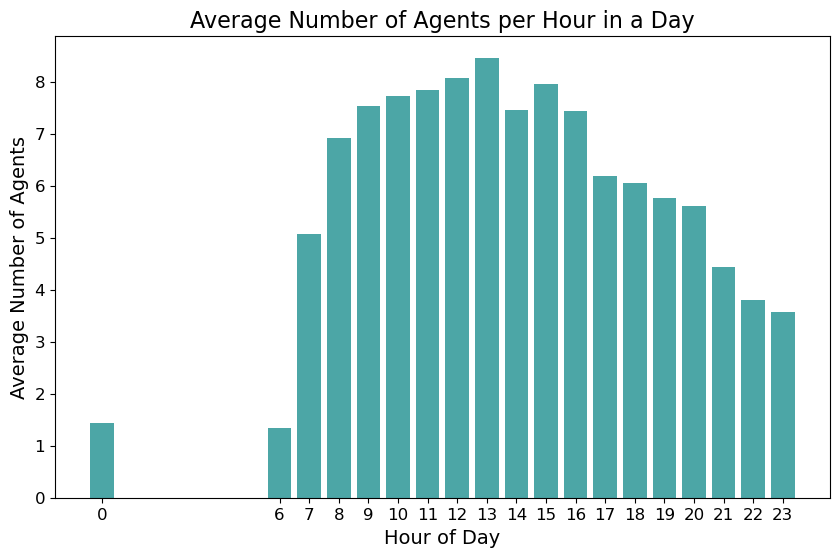

Overall Average Agents per Hour: 5.93


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("cleaned_july1999.csv")

# Convert service start time to datetime
df['ser_start'] = pd.to_datetime(df['ser_start'])

# Extract date and hour
df['date'] = df['ser_start'].dt.date
df['hour'] = df['ser_start'].dt.hour

# Count unique agents for each (date, hour)
agents_per_slot = df.groupby(['date', 'hour'])['server'].nunique().reset_index(name='num_agents')

# Calculate the average across all days for each hour
avg_agents_per_hour = agents_per_slot.groupby('hour')['num_agents'].mean().reset_index()

# Show results
print(avg_agents_per_hour)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(avg_agents_per_hour['hour'], avg_agents_per_hour['num_agents'], color='teal', alpha=0.7)
plt.title('Average Number of Agents per Hour in a Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Average Number of Agents', fontsize=14)
plt.xticks(avg_agents_per_hour['hour'], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Calculate the overall average number of agents per hour
overall_avg_agents = avg_agents_per_hour['num_agents'].mean()
print(f"Overall Average Agents per Hour: {overall_avg_agents:.2f}")


In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv("cleaned_july1999.csv")

# Ensure ser_time is numeric
df['ser_time'] = pd.to_numeric(df['ser_time'], errors='coerce')

# Group by server and collect list of ser_time values
server_service_list = df.groupby('server')['ser_time'].apply(list).reset_index()

# Rename column for clarity
server_service_list = server_service_list.rename(columns={'ser_time': 'ser_time_list'})

# Preview
display(server_service_list)


,server,ser_time_list
0,ANAT,"[82, 118, 127, 1351, 580, 457, 389, 142, 711, ..."
1,AVI,"[64, 81, 297, 61, 103, 52, 42, 34, 133, 134, 6..."
2,AVIDAN,"[77, 7, 67, 70, 388, 107, 94, 340, 59, 119, 64..."
3,AVNI,"[237, 11, 106, 354, 110, 119, 451, 193, 654, 3..."
4,BASCH,"[656, 171, 46, 61, 114, 33, 75, 380, 143, 43, ..."
5,BENSION,"[43, 351, 86, 79, 56, 57, 435, 157, 90, 359, 6..."
6,DARMON,"[726, 141, 19, 386, 248, 802, 239, 149, 721, 8..."
7,DORIT,"[97, 99, 56, 482, 191, 189, 179, 52, 115, 52, ..."
8,ELI,"[1267, 1396, 183, 152, 132, 183, 505, 484, 560..."
9,GELBER,"[281, 75, 72, 145, 57, 361, 50, 103, 123, 143,..."


In [11]:
import pandas as pd
import numpy as np
from numpy.random import default_rng

# -------------------------
# 0) Load & basic cleaning
# -------------------------
df = pd.read_csv("cleaned_july1999.csv")
df['ser_time'] = pd.to_numeric(df['ser_time'], errors='coerce')
df = df.dropna(subset=['server', 'ser_time'])

# ----------------------------------------------
# 1) Per-server list of historical service times
# ----------------------------------------------
server_service_list = (
    df.groupby('server')['ser_time']
      .apply(list)
      .reset_index(name='ser_time_list')
)

# ---------------------------------------------------------
# 2) For each server, randomly sample 10 and compute average
#    (with replacement if that server has < 10 observations)
# ---------------------------------------------------------
rng = default_rng(42)  # reproducible sampling

def sampled_avg_10(times):
    arr = np.asarray(times, dtype=float)
    if arr.size == 0:
        return np.nan
    take = rng.choice(arr, size=10, replace=(arr.size < 10))
    return float(np.mean(take))

server_service_list['sampled_avg_st'] = server_service_list['ser_time_list'].apply(sampled_avg_10)

# ------------------------------------------------------
# 3) Infer two groups: Senior (faster) vs Junior (slower)
#    - Sort by sampled_avg_st (ascending = faster)
#    - Split roughly half/half, with ties handled stably
# ------------------------------------------------------
ranked = server_service_list.sort_values('sampled_avg_st', kind='mergesort').reset_index(drop=True)
n = len(ranked)
n_senior = n // 2  # fastest half → Senior; if odd, Senior has floor(n/2)
ranked.loc[:n_senior-1, 'group'] = 'Senior'
ranked.loc[n_senior:, 'group']  = 'Junior'

# Merge back to main df
server_service_list = server_service_list.merge(
    ranked[['server', 'group']], on='server', how='left'
)

# ------------------------------------------------------
# 4) Randomly form teams of 3 from each group per shift
#    - No replacement *within* a shift
#    - Across shifts, people may repeat (set seed to control)
# ------------------------------------------------------
def draw_teams(df_agents, n_shifts=1, seed=123):
    rng_local = default_rng(seed)
    seniors = df_agents[df_agents['group'] == 'Senior']['server'].tolist()
    juniors = df_agents[df_agents['group'] == 'Junior']['server'].tolist()

    if len(seniors) < 3 or len(juniors) < 3:
        raise ValueError("Need at least 3 Seniors and 3 Juniors to form teams.")

    teams = []
    for s in range(1, n_shifts + 1):
        senior_team = rng_local.choice(seniors, size=3, replace=False).tolist()
        junior_team = rng_local.choice(juniors, size=3, replace=False).tolist()
        teams.append({'shift': s, 'senior_team': senior_team, 'junior_team': junior_team})
    return pd.DataFrame(teams)

# Example: build rosters for 5 shifts
teams_df = draw_teams(server_service_list, n_shifts=5, seed=7)

# -------------------------
# 5) Inspect results
# -------------------------
print("Per-agent sampled averages and inferred group (fastest first):")
display(server_service_list[['server', 'sampled_avg_st', 'group']]
        .sort_values(['group','sampled_avg_st'])
        .reset_index(drop=True))

print("\nRandom team selection per shift:")
display(teams_df)

# (Optional) quick group summary
print("\nGroup counts:")
print(server_service_list['group'].value_counts())


Per-agent sampled averages and inferred group (fastest first):


,server,sampled_avg_st,group
0,ROTH,171.7,Junior
1,SHLOMO,182.4,Junior
2,NAAMA,189.9,Junior
3,MEIR,195.2,Junior
4,VICKY,208.8,Junior
5,BASCH,224.4,Junior
6,GELBER,224.4,Junior
7,DORIT,249.3,Junior
8,AVNI,275.3,Junior
9,DARMON,279.6,Junior



Random team selection per shift:


,shift,senior_team,junior_team
0,1,"[TOVA, MORIAH, STEREN]","[SHLOMO, DARMON, PINHAS]"
1,2,"[TOVA, YIFAT, AVIDAN]","[BASCH, SHLOMO, ROTH]"
2,3,"[GILI, BENSION, STEREN]","[DARMON, GELBER, VICKY]"
3,4,"[KAZAV, MORIAH, ZOHARI]","[PINHAS, YITZ, VICKY]"
4,5,"[YIFAT, AVIDAN, GILI]","[AVNI, MEIR, BASCH]"



Group counts:
group
Junior    13
Senior    12
Name: count, dtype: int64


In [12]:
import pandas as pd
import numpy as np
from numpy.random import default_rng

# --- Start from your cleaned dataframe; if you only have df, just set df_clean = df ---
# Ensure df_clean exists; fall back to df if needed
try:
    _ = df_clean
except NameError:
    df_clean = df.copy()

# Make sure ser_time is numeric
df_clean['ser_time'] = pd.to_numeric(df_clean['ser_time'], errors='coerce')
df_clean = df_clean.dropna(subset=['server', 'ser_time']).copy()

# 1) Build per-server list of service times
server_service_list = (
    df_clean.groupby('server')['ser_time']
            .apply(list)
            .reset_index(name='ser_time_list')
)

# 2) For each server, randomly sample 10 service times and compute an average
rng = default_rng(42)  # reproducible

def sampled_avg_10(times):
    arr = np.asarray(times, dtype=float)
    if arr.size == 0:
        return np.nan
    take = rng.choice(arr, size=10, replace=(arr.size < 10))
    return float(np.mean(take))

server_service_list['sampled_avg_st'] = server_service_list['ser_time_list'].apply(sampled_avg_10)

# 3) Infer groups: fastest half (lower sampled_avg_st) -> Senior; rest -> Junior
ranked = server_service_list.sort_values('sampled_avg_st', kind='mergesort').reset_index(drop=True)
n = len(ranked)
n_senior = n // 2                      # adjust if you prefer a different split
ranked.loc[:n_senior-1, 'group_inferred'] = 'Senior'
ranked.loc[n_senior:,  'group_inferred'] = 'Junior'

# Attach group to the per-server table
server_service_list = server_service_list.merge(
    ranked[['server', 'group_inferred']], on='server', how='left'
)

# 4) Map Senior->A, Junior->B and merge into df_clean
server_service_list['group'] = server_service_list['group_inferred'].map({'Senior': 'A', 'Junior': 'B'})
df_clean = df_clean.merge(server_service_list[['server', 'group']], on='server', how='left')

# 5) Create shift_service_time column
df_clean['shift_service_time'] = df_clean['ser_time']

# --- Done: df_clean now has the requested columns ---
print(df_clean[['server', 'group', 'shift_service_time']].head())
print("\nGroup counts in df_clean:")
print(df_clean['group'].value_counts(dropna=False))



   server group  shift_service_time
0  MORIAH     A                 8.0
1  MORIAH     A               221.0
2    ANAT     A                82.0
3   KAZAV     A                78.0
4   YIFAT     A               588.0

Group counts in df_clean:
group
A    18482
B    10559
Name: count, dtype: int64


In [13]:
display(df_clean)

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,...,ser_start,ser_exit,ser_time,server,served,entry_hour,wait_time,weekday,group,shift_service_time
0,AA0101,41887,0,0,NW,1999-07-01,1999-07-01 06:58:10,1999-07-01 06:58:20,10.0,1999-07-01 06:58:20,...,1999-07-01 06:59:07,1999-07-01 06:59:15,8.0,MORIAH,True,6,57.0,3,A,8.0
1,AA0101,41888,0,0,PS,1999-07-01,1999-07-01 07:30:27,1999-07-01 07:30:35,8.0,1999-07-01 00:00:00,...,1999-07-01 07:30:35,1999-07-01 07:34:16,221.0,MORIAH,True,7,8.0,3,A,221.0
2,AA0101,41889,22800312,2,PS,1999-07-01,1999-07-01 07:49:32,1999-07-01 07:49:37,5.0,1999-07-01 07:49:37,...,1999-07-01 07:50:26,1999-07-01 07:51:48,82.0,ANAT,True,7,54.0,3,A,82.0
3,AA0101,41890,0,0,PS,1999-07-01,1999-07-01 08:03:56,1999-07-01 08:04:08,12.0,1999-07-01 00:00:00,...,1999-07-01 08:04:07,1999-07-01 08:05:25,78.0,KAZAV,True,8,11.0,3,A,78.0
4,AA0101,41891,0,0,PS,1999-07-01,1999-07-01 08:22:12,1999-07-01 08:22:25,13.0,1999-07-01 00:00:00,...,1999-07-01 08:22:24,1999-07-01 08:32:12,588.0,YIFAT,True,8,12.0,3,A,588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29036,AA0216,7886,0,0,IN,1999-07-30,1999-07-30 12:46:50,1999-07-30 12:46:59,9.0,1999-07-30 12:46:59,...,1999-07-30 12:48:27,1999-07-30 12:49:47,80.0,BENSION,True,12,97.0,4,A,80.0
29037,AA0216,7887,0,0,IN,1999-07-30,1999-07-30 13:01:19,1999-07-30 13:01:38,19.0,1999-07-30 00:00:00,...,1999-07-30 13:01:37,1999-07-30 13:15:12,815.0,BENSION,True,13,18.0,4,A,815.0
29038,AA0216,7888,0,0,IN,1999-07-30,1999-07-30 13:30:21,1999-07-30 13:30:36,15.0,1999-07-30 00:00:00,...,1999-07-30 13:30:35,1999-07-30 13:32:58,143.0,SHARON,True,13,14.0,4,A,143.0
29039,AA0216,7895,0,0,IN,1999-07-31,1999-07-31 22:09:48,1999-07-31 22:10:07,19.0,1999-07-31 00:00:00,...,1999-07-31 22:10:06,1999-07-31 22:11:46,100.0,AVI,True,22,18.0,5,A,100.0


In [14]:
# Save cleaned data
df_clean.to_csv("cleaned_july1999.csv", index=False)
print("Completed preprocessing and saved as 'cleaned_july1999.csv'")

Completed preprocessing and saved as 'cleaned_july1999.csv'


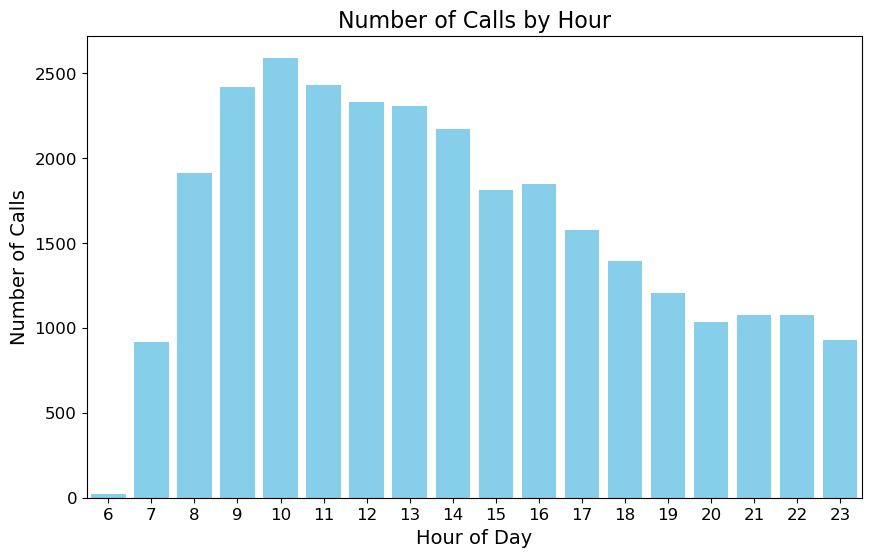

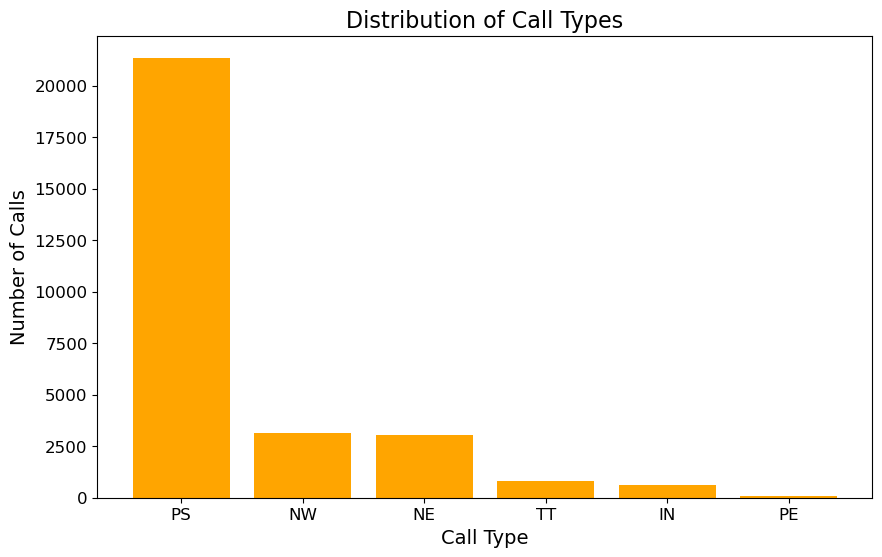

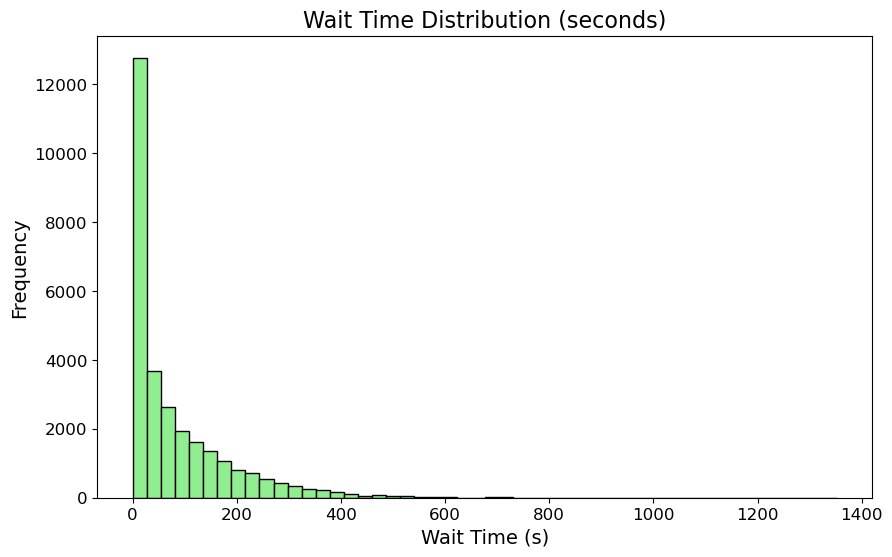

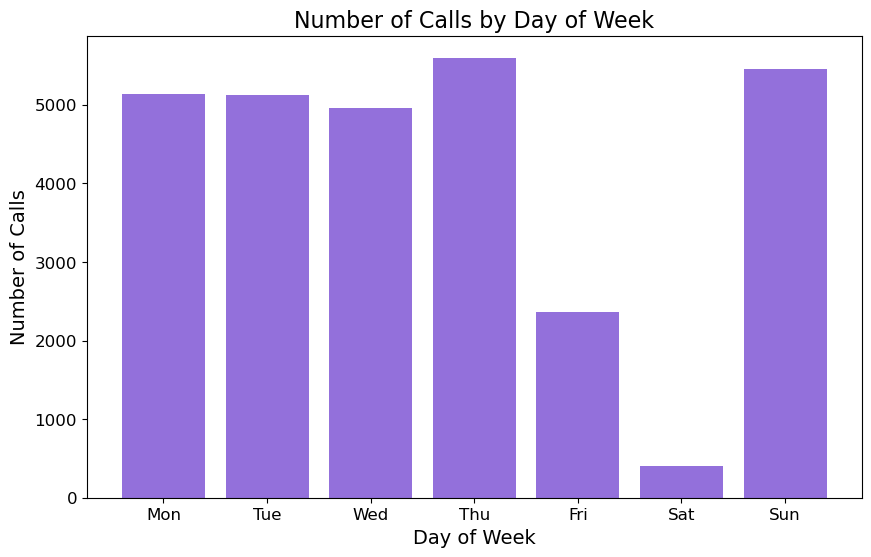

In [15]:
import matplotlib.pyplot as plt

# ---- Prepare data for plots ----
# 1. Calls per hour
hour_range = list(range(6, 24))
calls_per_hour = df_clean['entry_hour'].value_counts().reindex(hour_range, fill_value=0)

# 2. Distribution of call types
type_distribution = df_clean['type'].value_counts()

# 3. Wait time distribution
valid_wait_times = df_clean[df_clean['wait_time'] >= 0]['wait_time']

# 4. Calls by weekday
weekday_counts = df_clean['weekday'].value_counts().sort_index()
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# ---- Plot 1: Number of calls by hour ----
plt.figure(figsize=(10, 6))
plt.bar(calls_per_hour.index, calls_per_hour.values, color='skyblue')
plt.title('Number of Calls by Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Number of Calls', fontsize=14)
plt.xticks(hour_range, fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(5.5, 23.5)
plt.show()

# ---- Plot 2: Distribution of call types ----
plt.figure(figsize=(10, 6))
plt.bar(type_distribution.index, type_distribution.values, color='orange')
plt.title('Distribution of Call Types', fontsize=16)
plt.xlabel('Call Type', fontsize=14)
plt.ylabel('Number of Calls', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# ---- Plot 3: Wait time distribution ----
plt.figure(figsize=(10, 6))
plt.hist(valid_wait_times, bins=50, color='lightgreen', edgecolor='black')
plt.title('Wait Time Distribution (seconds)', fontsize=16)
plt.xlabel('Wait Time (s)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# ---- Plot 4: Calls by weekday ----
plt.figure(figsize=(10, 6))
plt.bar(weekday_labels, weekday_counts.values, color='mediumpurple')
plt.title('Number of Calls by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Number of Calls', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


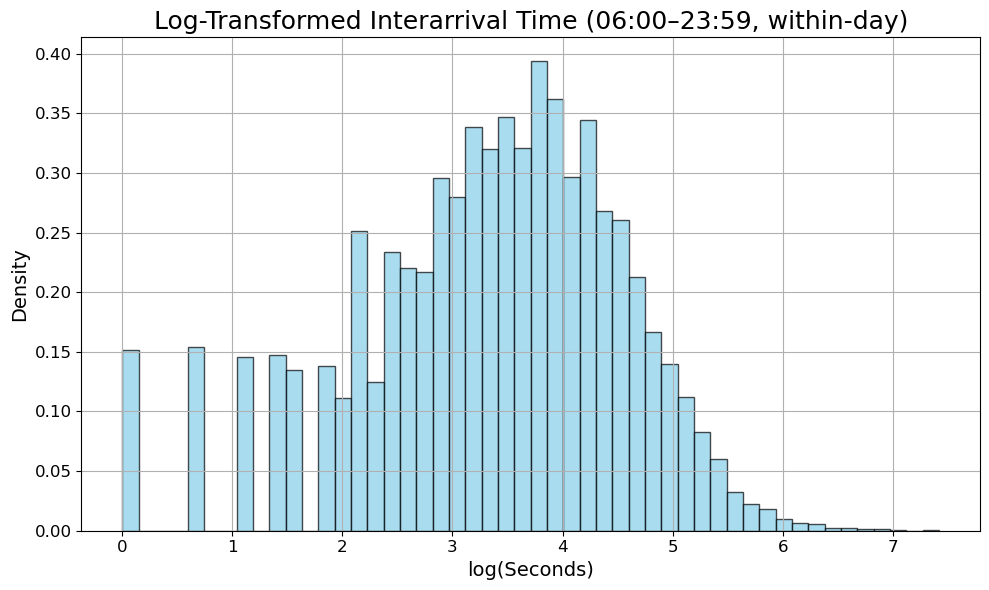

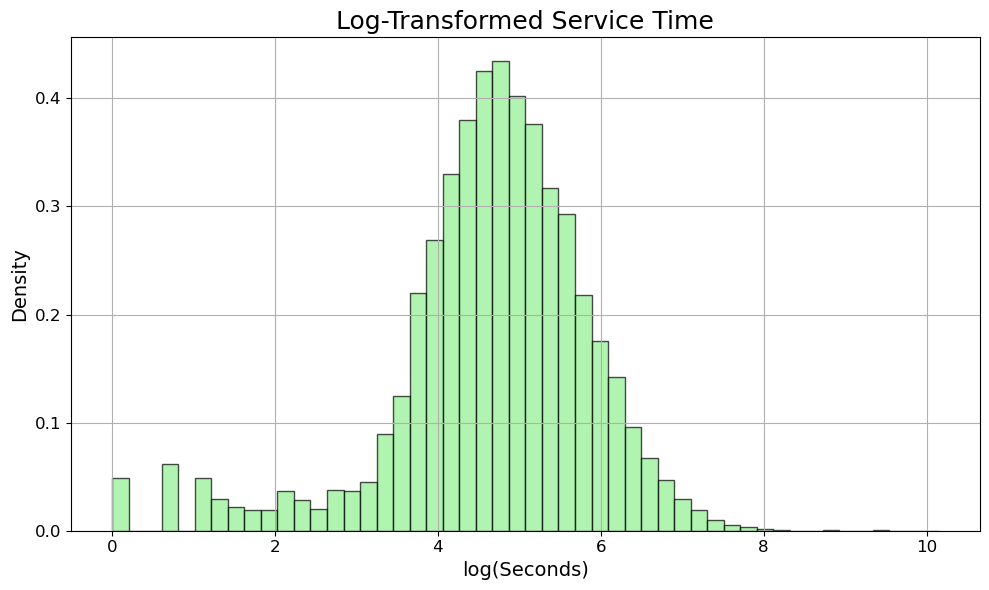

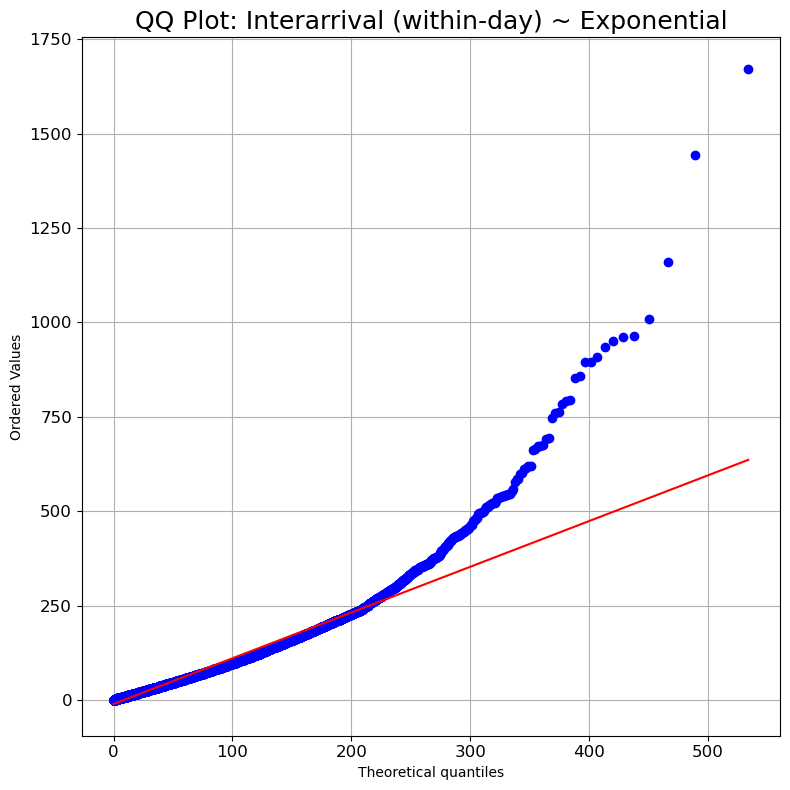

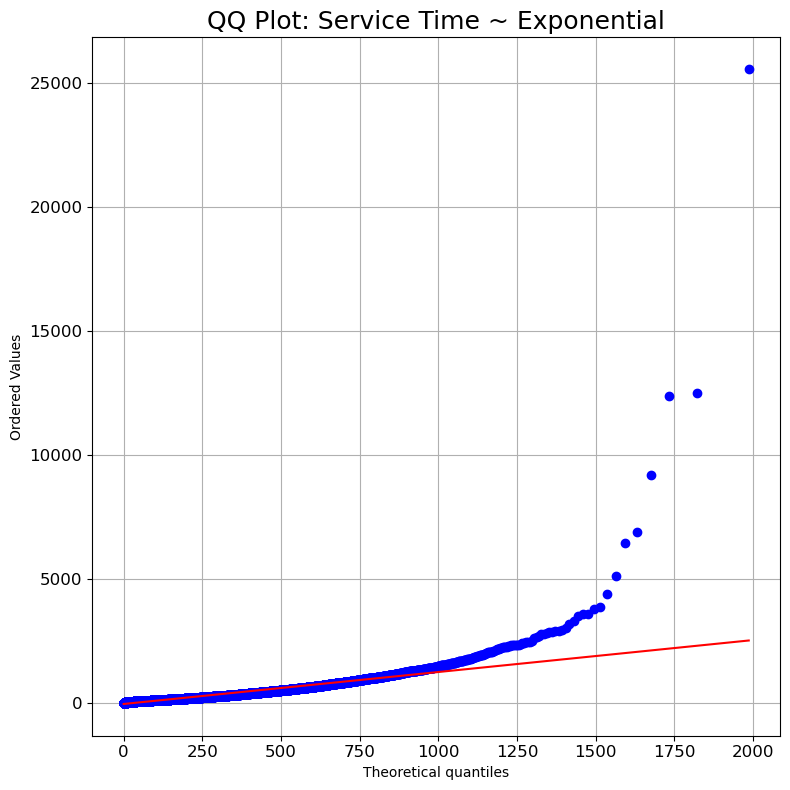

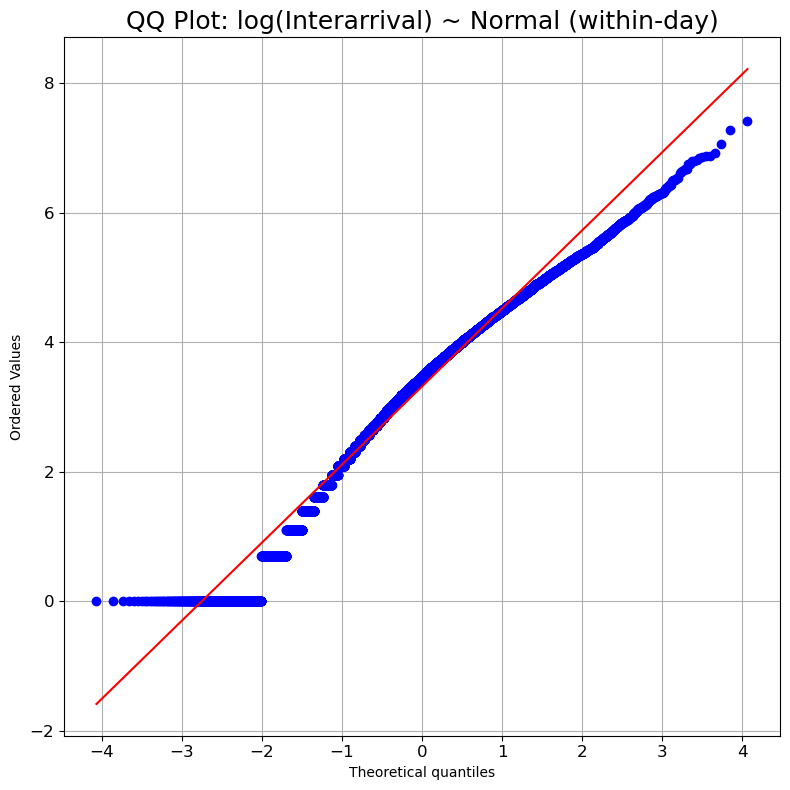

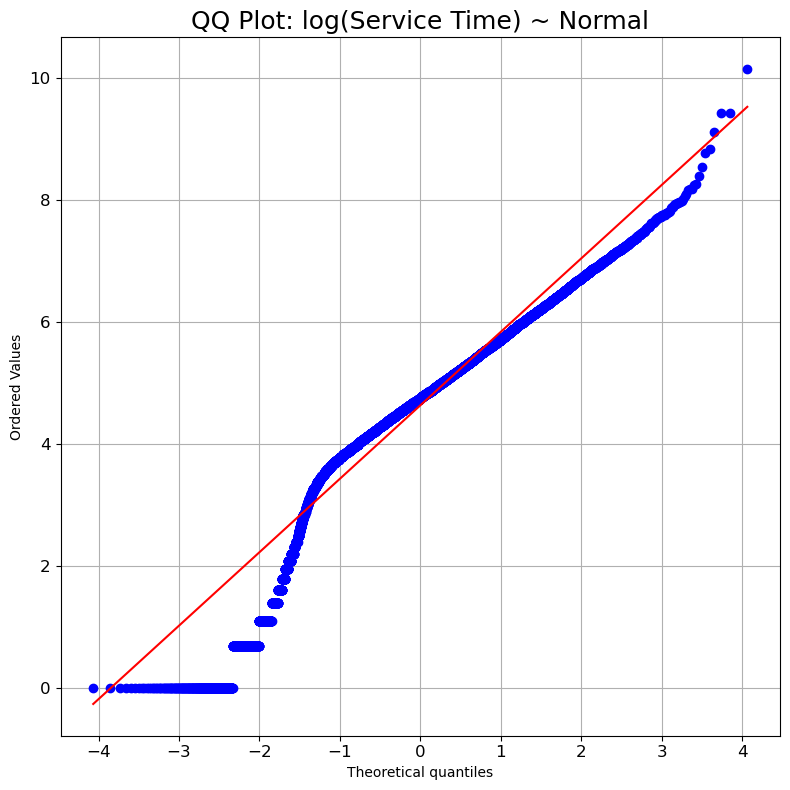

Estimated Interarrival Rate (λ) [06:00–23:59, within-day]: 0.01994 per second
Estimated Service Rate (μ): 0.00536 per second

Kolmogorov–Smirnov Test Results:
  Interarrival ~ Exp: D = 0.0407, p = 0.0000
  Service Time ~ Exp: D = 0.0629, p = 0.0000


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, kstest, probplot, norm

# --- Load & base filter ---
df = pd.read_csv("cleaned_july1999.csv", parse_dates=['vru_entry'])
df_served = (df[df['ser_time'] > 0]
             .copy()
             .sort_values('vru_entry')
             .reset_index(drop=True))

# Keep only arrivals during operating hours (06:00–23:59)
df_served['hour'] = df_served['vru_entry'].dt.hour
df_served = df_served[df_served['hour'].between(6, 23)]

# Compute interarrival times *within each day* (no cross‑midnight gaps)
df_served['day'] = df_served['vru_entry'].dt.date
df_served['interarrival'] = (
    df_served.groupby('day')['vru_entry']
             .diff()
             .dt.total_seconds()
)

# Drop the first arrival of each day (NaN interarrival)
interarrival = df_served['interarrival'].dropna()

# --- Service times (unchanged) ---
service_time = df_served['ser_time']

# --- Rates & KS tests (based on filtered interarrival) ---
interarrival_rate = 1 / interarrival.mean()
service_rate = 1 / service_time.mean()

ks_stat_ia, ks_pval_ia = kstest(interarrival, 'expon', args=(0, 1/interarrival_rate))
ks_stat_st, ks_pval_st = kstest(service_time, 'expon', args=(0, 1/service_rate))

# --- Log transforms (exclude zeros) ---
log_interarrival = np.log(interarrival[interarrival > 0])
log_service_time = np.log(service_time[service_time > 0])

# --- Plot settings ---
title_font = {'fontsize': 18}
label_font = {'fontsize': 14}
tick_fontsize = 12

# 1) Histogram log(interarrival)
plt.figure(figsize=(10, 6))
plt.hist(log_interarrival, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Log-Transformed Interarrival Time (06:00–23:59, within-day)", **title_font)
plt.xlabel("log(Seconds)", **label_font)
plt.ylabel("Density", **label_font)
plt.xticks(fontsize=tick_fontsize); plt.yticks(fontsize=tick_fontsize)
plt.grid(True); plt.tight_layout(); plt.show()

# 2) Histogram log(service_time)
plt.figure(figsize=(10, 6))
plt.hist(log_service_time, bins=50, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title("Log-Transformed Service Time", **title_font)
plt.xlabel("log(Seconds)", **label_font)
plt.ylabel("Density", **label_font)
plt.xticks(fontsize=tick_fontsize); plt.yticks(fontsize=tick_fontsize)
plt.grid(True); plt.tight_layout(); plt.show()

# 3) QQ: interarrival vs exponential
plt.figure(figsize=(8, 8))
probplot(interarrival, dist=expon(scale=1/interarrival_rate), plot=plt)
plt.title("QQ Plot: Interarrival (within-day) ~ Exponential", **title_font)
plt.xticks(fontsize=tick_fontsize); plt.yticks(fontsize=tick_fontsize)
plt.grid(True); plt.tight_layout(); plt.show()

# 4) QQ: service vs exponential
plt.figure(figsize=(8, 8))
probplot(service_time, dist=expon(scale=1/service_rate), plot=plt)
plt.title("QQ Plot: Service Time ~ Exponential", **title_font)
plt.xticks(fontsize=tick_fontsize); plt.yticks(fontsize=tick_fontsize)
plt.grid(True); plt.tight_layout(); plt.show()

# 5) QQ: log(interarrival) vs normal (log-normal check)
plt.figure(figsize=(8, 8))
probplot(log_interarrival, dist=norm, plot=plt)
plt.title("QQ Plot: log(Interarrival) ~ Normal (within-day)", **title_font)
plt.xticks(fontsize=tick_fontsize); plt.yticks(fontsize=tick_fontsize)
plt.grid(True); plt.tight_layout(); plt.show()

# 6) QQ: log(service) vs normal (log-normal check)
plt.figure(figsize=(8, 8))
probplot(log_service_time, dist=norm, plot=plt)
plt.title("QQ Plot: log(Service Time) ~ Normal", **title_font)
plt.xticks(fontsize=tick_fontsize); plt.yticks(fontsize=tick_fontsize)
plt.grid(True); plt.tight_layout(); plt.show()

# --- Print summary ---
print(f"Estimated Interarrival Rate (λ) [06:00–23:59, within-day]: {interarrival_rate:.5f} per second")
print(f"Estimated Service Rate (μ): {service_rate:.5f} per second\n")
print("Kolmogorov–Smirnov Test Results:")
print(f"  Interarrival ~ Exp: D = {ks_stat_ia:.4f}, p = {ks_pval_ia:.4f}")
print(f"  Service Time ~ Exp: D = {ks_stat_st:.4f}, p = {ks_pval_st:.4f}")


FCFS

In [17]:
import numpy as np
import pandas as pd
from heapq import heappush, heappop
import random

# -----------------------------
# 0) Load & assumptions/inputs
# -----------------------------
np.random.seed(42)
random.seed(42)

QUEUE_LIMIT = 10           # capacity per queue (waiting spots)
C_A, C_B = 3, 3           # parallel servers in A and B (set to 1 to collapse to single server)
RATIO_PS = 0.7352
RATIO_NON_PS = 0.2648
NON_PS_TYPES = ['NW','NE','PE','TT','IN']

# Load your cleaned dataframe that already has 'group' (A/B) and 'shift_service_time'
df_clean = pd.read_csv("cleaned_july1999.csv", parse_dates=['vru_entry','ser_start','date'])
if 'group' not in df_clean.columns:
    raise ValueError("df_clean must include a 'group' column (values 'A'/'B').")
if 'shift_service_time' not in df_clean.columns:
    # fallback: use raw service time if shift_service_time not provided
    df_clean['shift_service_time'] = pd.to_numeric(df_clean['ser_time'], errors='coerce')

# -----------------------------
# 1) Interarrival: log-normal fit
#     - within-day differences
#     - only 06:00–23:59
# -----------------------------
df_i = (df_clean[['vru_entry']]
        .dropna()
        .sort_values('vru_entry')
        .copy())
df_i['hour'] = df_i['vru_entry'].dt.hour
df_i = df_i[df_i['hour'].between(6, 23)]
df_i['day'] = df_i['vru_entry'].dt.date
interarrival_sec = (df_i.groupby('day')['vru_entry']
                      .diff()
                      .dt.total_seconds()
                      .dropna())
interarrival_sec = interarrival_sec[interarrival_sec > 0]

# log-normal parameters for interarrival
log_ia = np.log(interarrival_sec.values)
IA_MU, IA_SIGMA = log_ia.mean(), log_ia.std(ddof=1)

def draw_interarrival():
    # draw seconds from log-normal
    return float(np.random.lognormal(mean=IA_MU, sigma=IA_SIGMA))

# If you want the "rate" summary too (for your notes)
ARRIVAL_RATE = 1.0 / interarrival_sec.mean()  # not used in sampling, just FYI

# --------------------------------------------
# 2) Service-time fits per (group, call_type)
#     - fit log-normal on shift_service_time
#     - also expose mean->rate if you ever need exp
# --------------------------------------------
df_st = df_clean[['group','type','shift_service_time']].dropna().copy()
df_st['is_ps'] = (df_st['type'] == 'PS')
df_st['is_nonps'] = df_st['type'].isin(NON_PS_TYPES)

def _fit_lognormal(x):
    x = np.asarray(x, dtype=float)
    x = x[x > 0]
    if x.size == 0:
        return (np.nan, np.nan, np.nan, np.nan)
    logx = np.log(x)
    mu, sigma = logx.mean(), logx.std(ddof=1)
    mean_val = x.mean()
    rate = 1.0 / mean_val
    return (mu, sigma, mean_val, rate)

# Fit by A/B × {PS, Non-PS}
fit = {}
for g in ['A','B']:
    # PS
    x_ps = df_st[(df_st['group']==g) & (df_st['is_ps'])]['shift_service_time'].values
    mu_ps, s_ps, mean_ps, rate_ps = _fit_lognormal(x_ps)
    # Non-PS
    x_np = df_st[(df_st['group']==g) & (df_st['is_nonps'])]['shift_service_time'].values
    mu_np, s_np, mean_np, rate_np = _fit_lognormal(x_np)
    fit[g] = {
        'PS':     {'mu': mu_ps, 'sigma': s_ps, 'mean': mean_ps, 'rate': rate_ps},
        'Non-PS': {'mu': mu_np, 'sigma': s_np, 'mean': mean_np, 'rate': rate_np},
    }

SERVICE_rate_A = {'PS': fit['A']['PS']['rate'], 'Non-PS': fit['A']['Non-PS']['rate']}
SERVICE_rate_B = {'PS': fit['B']['PS']['rate'], 'Non-PS': fit['B']['Non-PS']['rate']}
# print for reference
print("Estimated service rates (1/mean seconds):")
print("A:", SERVICE_rate_A)
print("B:", SERVICE_rate_B)

def draw_service_time(group_label, call_type):
    """
    Sample service time (seconds) from the fitted log-normal for (group, type).
    Falls back to mean if fit is missing.
    """
    rec = fit[group_label][call_type]
    mu, sigma, mean_val = rec['mu'], rec['sigma'], rec['mean']
    if np.isnan(mu) or np.isnan(sigma):
        return float(mean_val) if not np.isnan(mean_val) else 0.0
    return float(np.random.lognormal(mean=mu, sigma=sigma))

# --------------------------------------------
# 3) FCFS simulation (two queues, c parallel servers)
# --------------------------------------------
class GroupQueue:
    def __init__(self, name, capacity, c_servers):
        self.name = name
        self.capacity = capacity
        self.c = c_servers
        self.busy_until_heap = []  # heap of service end times
        self.wait_q = []           # list of (arrival_time, call_type)
        self.in_service = 0

    def free_servers(self, now):
        # release all finished services by 'now'
        while self.busy_until_heap and self.busy_until_heap[0] <= now:
            heappop(self.busy_until_heap)
            self.in_service -= 1

    def can_start_now(self):
        return self.in_service < self.c

    def start_service(self, now, call_type):
        self.in_service += 1
        svc = draw_service_time(self.name, call_type)
        end = now + svc
        heappush(self.busy_until_heap, end)
        return svc, end

    def queue_len(self):
        return len(self.wait_q)

# Routing: shorter queue (random tie)
def choose_group(gA: GroupQueue, gB: GroupQueue):
    lenA, lenB = gA.queue_len(), gB.queue_len()
    if lenA < lenB:
        return gA
    elif lenB < lenA:
        return gB
    else:
        return gA if random.random() < 0.5 else gB

def draw_call_type():
    return 'PS' if (random.random() < RATIO_PS) else 'Non-PS'

def simulate(num_arrivals=20000, start_time=0.0):
    gA = GroupQueue('A', QUEUE_LIMIT, C_A)
    gB = GroupQueue('B', QUEUE_LIMIT, C_B)

    t = float(start_time)
    next_arrival = t + draw_interarrival()

    # For completions, we'll peek the earliest end across both groups
    def next_completion_time():
        opts = []
        if gA.busy_until_heap:
            opts.append(gA.busy_until_heap[0])
        if gB.busy_until_heap:
            opts.append(gB.busy_until_heap[0])
        return min(opts) if opts else np.inf

    records = []
    drops = 0
    arrivals_processed = 0

    while arrivals_processed < num_arrivals or (gA.busy_until_heap or gA.wait_q or gB.busy_until_heap or gB.wait_q):
        t_complete = next_completion_time()

        # Next event: arrival vs next completion
        if arrivals_processed < num_arrivals and next_arrival <= t_complete:
            # process arrival
            t = next_arrival
            # free any completed services at arrival time
            gA.free_servers(t)
            gB.free_servers(t)

            call_type = draw_call_type()
            # route to queue
            grp = choose_group(gA, gB)

            # try to start immediately if server is free
            if grp.can_start_now():
                svc, end = grp.start_service(t, call_type)
                records.append({
                    'time_arrival': t,
                    'time_start': t,
                    'time_end': end,
                    'wait': 0.0,
                    'group': grp.name,
                    'call_type': call_type,
                    'service_time': svc,
                    'queued': False,
                    'dropped': False
                })
            else:
                # enqueue if capacity allows
                if grp.queue_len() < grp.capacity:
                    grp.wait_q.append((t, call_type))
                else:
                    drops += 1
                    records.append({
                        'time_arrival': t,
                        'time_start': np.nan,
                        'time_end': np.nan,
                        'wait': np.nan,
                        'group': grp.name,
                        'call_type': call_type,
                        'service_time': np.nan,
                        'queued': True,
                        'dropped': True
                    })

            # schedule next arrival
            next_arrival = t + draw_interarrival()
            arrivals_processed += 1

            # After arrival, if servers become free exactly at t, pull from queue
            for grp in (gA, gB):
                while grp.can_start_now() and grp.wait_q:
                    arr_t, ctype = grp.wait_q.pop(0)
                    wait = max(0.0, t - arr_t)
                    svc, end = grp.start_service(t, ctype)
                    records.append({
                        'time_arrival': arr_t,
                        'time_start': t,
                        'time_end': end,
                        'wait': wait,
                        'group': grp.name,
                        'call_type': ctype,
                        'service_time': svc,
                        'queued': True,
                        'dropped': False
                    })

        else:
            # process the next completion (no arrival sooner)
            if t_complete == np.inf:
                break  # nothing left
            t = t_complete
            # release finished services at time t
            gA.free_servers(t)
            gB.free_servers(t)
            # start queued if any server is free at t
            for grp in (gA, gB):
                while grp.can_start_now() and grp.wait_q:
                    arr_t, ctype = grp.wait_q.pop(0)
                    wait = max(0.0, t - arr_t)
                    svc, end = grp.start_service(t, ctype)
                    records.append({
                        'time_arrival': arr_t,
                        'time_start': t,
                        'time_end': end,
                        'wait': wait,
                        'group': grp.name,
                        'call_type': ctype,
                        'service_time': svc,
                        'queued': True,
                        'dropped': False
                    })

    out = pd.DataFrame(records)
    out['sojourn'] = out['time_end'] - out['time_arrival']
    kpis = {
        'arrivals_simulated': num_arrivals,
        'served': int((~out['dropped']).sum()),
        'dropped': int(out['dropped'].sum()),
        'drop_rate': float(out['dropped'].mean()) if len(out) else 0.0,
        'avg_wait': float(out.loc[~out['dropped'], 'wait'].mean()),
        'p95_wait': float(out.loc[~out['dropped'], 'wait'].quantile(0.95)),
        'avg_sojourn': float(out.loc[~out['dropped'], 'sojourn'].mean())
    }
    return out, kpis

# -----------------------------
# 4) Run the simulation
# -----------------------------
sim_df, summary = simulate(num_arrivals=len(df_clean))
print("Summary KPIs:", summary)

# If you also want hourly utilization curves, queue length traces, etc., say the word.


Estimated service rates (1/mean seconds):
A: {'PS': 0.006156804541760685, 'Non-PS': 0.00608294497243917}
B: {'PS': 0.004488106201406001, 'Non-PS': 0.004112415911020119}
Summary KPIs: {'arrivals_simulated': 29041, 'served': 28943, 'dropped': 98, 'drop_rate': 0.003374539444234014, 'avg_wait': 89.15066990592854, 'p95_wait': 486.0312850657617, 'avg_sojourn': 309.7769026276168}


In [18]:
import numpy as np
import pandas as pd
from heapq import heappush, heappop
import random
import matplotlib.pyplot as plt

# ------------------------------------------------
# Helpers you already had (arrival/service samplers)
# ------------------------------------------------
# Assumes you have IA_MU, IA_SIGMA (log-normal interarrival params),
# RATIO_PS, and a `fit` dict with per-group log-normal params as in your last code.

def draw_interarrival():
    return float(np.random.lognormal(mean=IA_MU, sigma=IA_SIGMA))

def draw_call_type():
    return 'PS' if (random.random() < RATIO_PS) else 'Non-PS'

def draw_service_time(group_label, call_type):
    rec = fit[group_label][call_type]
    mu, sigma, mean_val = rec['mu'], rec['sigma'], rec['mean']
    if np.isnan(mu) or np.isnan(sigma):
        return float(mean_val) if not np.isnan(mean_val) else 0.0
    return float(np.random.lognormal(mean=mu, sigma=sigma))

# ------------------------------------------------
# Queue/Server structure with time-weighted tracking
# ------------------------------------------------
class GroupQueue:
    def __init__(self, name, capacity, c_servers):
        self.name = name
        self.capacity = capacity
        self.c = c_servers
        self.busy_until_heap = []  # heap of service end times
        self.wait_q = []           # list of (arrival_time, call_type)
        self.in_service = 0

        # Time-weighted integrals
        self.busy_area = 0.0       # ∫ in_service dt
        self.queue_area = 0.0      # ∫ queue_len dt

    def free_servers(self, now):
        # Release all finished by 'now'
        while self.busy_until_heap and self.busy_until_heap[0] <= now:
            heappop(self.busy_until_heap)
            self.in_service -= 1

    def can_start_now(self):
        return self.in_service < self.c

    def start_service(self, now, call_type):
        self.in_service += 1
        svc = draw_service_time(self.name, call_type)
        end = now + svc
        heappush(self.busy_until_heap, end)
        return svc, end

    def qlen(self):
        return len(self.wait_q)

# ------------------------------------------------
# Main simulation with time-weighted metrics
# ------------------------------------------------
def simulate(num_arrivals=20000, start_time=0.0, queue_limit=10, cA=3, cB=3, seed=42):
    np.random.seed(seed); random.seed(seed)

    gA = GroupQueue('A', queue_limit, cA)
    gB = GroupQueue('B', queue_limit, cB)

    t = float(start_time)
    next_arrival = t + draw_interarrival()

    def next_completion_time():
        opts = []
        if gA.busy_until_heap:
            opts.append(gA.busy_until_heap[0])
        if gB.busy_until_heap:
            opts.append(gB.busy_until_heap[0])
        return min(opts) if opts else np.inf

    records = []
    drops = 0
    arrivals_done = 0

    # time-weighted accumulation
    last_t = t

    # for plotting queue length across arrivals
    q_trace = []  # list of dicts: {'idx': i, 'time': t, 'qA': ..., 'qB': ...}

    while arrivals_done < num_arrivals or (gA.busy_until_heap or gA.wait_q or gB.busy_until_heap or gB.wait_q):
        t_complete = next_completion_time()
        # Pick next event time
        if arrivals_done < num_arrivals and next_arrival <= t_complete:
            t_event = next_arrival  # arrival next
            event_type = 'arrival'
        else:
            t_event = t_complete    # completion next (or ∞)
            event_type = 'completion'
            if t_event == np.inf:
                break

        # ---- Time-weighted accumulation up to t_event
        dt = t_event - last_t
        if dt > 0:
            gA.busy_area   += gA.in_service * dt
            gB.busy_area   += gB.in_service * dt
            gA.queue_area  += gA.qlen() * dt
            gB.queue_area  += gB.qlen() * dt
            last_t = t_event

        # Advance time
        t = t_event

        if event_type == 'arrival':
            # Release servers completed by t
            gA.free_servers(t)
            gB.free_servers(t)

            # Arrival: pick type, route to shorter queue (tie random)
            call_type = draw_call_type()
            lenA, lenB = gA.qlen(), gB.qlen()
            if lenA < lenB:
                grp = gA
            elif lenB < lenA:
                grp = gB
            else:
                grp = gA if random.random() < 0.5 else gB

            # Try to start immediately
            if grp.can_start_now():
                svc, end = grp.start_service(t, call_type)
                records.append({
                    'time_arrival': t, 'time_start': t, 'time_end': end,
                    'wait': 0.0, 'group': grp.name, 'call_type': call_type,
                    'service_time': svc, 'queued': False, 'dropped': False
                })
            else:
                # Enqueue if capacity ok, else drop
                if grp.qlen() < grp.capacity:
                    grp.wait_q.append((t, call_type))
                else:
                    drops += 1
                    records.append({
                        'time_arrival': t, 'time_start': np.nan, 'time_end': np.nan,
                        'wait': np.nan, 'group': grp.name, 'call_type': call_type,
                        'service_time': np.nan, 'queued': True, 'dropped': True
                    })

            # After arrival, start queued jobs at t if servers free (both groups)
            for grp2 in (gA, gB):
                while grp2.can_start_now() and grp2.wait_q:
                    arr_t, ctype = grp2.wait_q.pop(0)
                    wait = max(0.0, t - arr_t)
                    svc, end = grp2.start_service(t, ctype)
                    records.append({
                        'time_arrival': arr_t, 'time_start': t, 'time_end': end,
                        'wait': wait, 'group': grp2.name, 'call_type': ctype,
                        'service_time': svc, 'queued': True, 'dropped': False
                    })

            # Record queue lengths after processing this arrival
            q_trace.append({'idx': arrivals_done+1, 'time': t, 'qA': gA.qlen(), 'qB': gB.qlen()})

            # Schedule next arrival
            next_arrival = t + draw_interarrival()
            arrivals_done += 1

        else:
            # Completion event: free finished servers at t
            gA.free_servers(t)
            gB.free_servers(t)

            # Start from queues if servers free
            for grp in (gA, gB):
                while grp.can_start_now() and grp.wait_q:
                    arr_t, ctype = grp.wait_q.pop(0)
                    wait = max(0.0, t - arr_t)
                    svc, end = grp.start_service(t, ctype)
                    records.append({
                        'time_arrival': arr_t, 'time_start': t, 'time_end': end,
                        'wait': wait, 'group': grp.name, 'call_type': ctype,
                        'service_time': svc, 'queued': True, 'dropped': False
                    })

            # (We only plot per-arrival, so no q_trace append here)

    # Output data
    out = pd.DataFrame(records)
    out['sojourn'] = out['time_end'] - out['time_arrival']

    # Totals and time horizon for utilization/avg queue length
    if len(out):
        t0 = float(out['time_arrival'].min(skipna=True))
        t1 = float(np.nanmax(out['time_end'].values)) if out['time_end'].notna().any() else float(out['time_arrival'].max())
        total_time = max(t1 - t0, 1e-9)
    else:
        total_time = 1.0

    # Time-weighted averages
    avg_qA = gA.queue_area / total_time
    avg_qB = gB.queue_area / total_time
    util_A = (gA.busy_area / total_time) / gA.c
    util_B = (gB.busy_area / total_time) / gB.c

    # Overall KPIs
    served_mask = ~out['dropped']
    summary = {
        'arrivals_simulated': int(arrivals_done),
        'served': int(served_mask.sum()),
        'dropped': int((~served_mask).sum()),
        'drop_rate': float((~served_mask).mean()) if len(out) else 0.0,
        'avg_wait': float(out.loc[served_mask, 'wait'].mean()),
        'p95_wait': float(out.loc[served_mask, 'wait'].quantile(0.95)),
        'avg_sojourn': float(out.loc[served_mask, 'sojourn'].mean()),
        # New per-group metrics
        'util_A': float(util_A),
        'util_B': float(util_B),
        'avg_queue_A': float(avg_qA),
        'avg_queue_B': float(avg_qB),
    }

    q_trace_df = pd.DataFrame(q_trace)  # index over arrivals
    return out, summary, q_trace_df


In [19]:
def _sec_per_call(rate):
    return (1.0 / rate) if (rate and rate > 0) else float("nan")

def fcfs_print_summary(SERVICE_rate_A, SERVICE_rate_B, summary,
                       title="First-Come, First-Served (FCFS) Routing Simulation – Summary"):
    a_ps   = SERVICE_rate_A.get('PS', float('nan'))
    a_nps  = SERVICE_rate_A.get('Non-PS', float('nan'))
    b_ps   = SERVICE_rate_B.get('PS', float('nan'))
    b_nps  = SERVICE_rate_B.get('Non-PS', float('nan'))

    a_ps_sec  = _sec_per_call(a_ps);  a_nps_sec = _sec_per_call(a_nps)
    b_ps_sec  = _sec_per_call(b_ps);  b_nps_sec = _sec_per_call(b_nps)

    arr   = int(summary.get('arrivals_simulated', 0))
    served= int(summary.get('served', 0))
    drop  = int(summary.get('dropped', 0))
    drate = float(summary.get('drop_rate', 0.0)) * 100
    avg_w = float(summary.get('avg_wait', float('nan')))
    p95_w = float(summary.get('p95_wait', float('nan')))
    avg_s = float(summary.get('avg_sojourn', float('nan')))
    utilA = float(summary.get('util_A', float('nan'))) * 100
    utilB = float(summary.get('util_B', float('nan'))) * 100
    qA    = float(summary.get('avg_queue_A', float('nan')))
    qB    = float(summary.get('avg_queue_B', float('nan')))

    lines = []
    lines.append(title)
    lines.append("")
    lines.append(f"- Total Calls Simulated: {arr:,}")
    lines.append("- Service Rates (calls/sec) — derived from historical average service times:")
    lines.append(f"  - Agent Group A:")
    lines.append(f"    - PS calls: {a_ps:.6f}  (≈ {a_ps_sec:.1f} seconds per call)")
    lines.append(f"    - Non-PS calls: {a_nps:.6f}  (≈ {a_nps_sec:.1f} seconds per call)")
    lines.append(f"  - Agent Group B:")
    lines.append(f"    - PS calls: {b_ps:.6f}  (≈ {b_ps_sec:.1f} seconds per call)")
    lines.append(f"    - Non-PS calls: {b_nps:.6f}  (≈ {b_nps_sec:.1f} seconds per call)")
    lines.append("")
    lines.append("- Simulation Results:")
    lines.append(f"  - Calls served: {served:,}")
    lines.append(f"  - Calls dropped (queue full): {drop:,}")
    lines.append(f"  - Drop rate: {drate:.2f}%")
    lines.append(f"  - Average waiting time: {avg_w:.2f} seconds")
    lines.append(f"  - 95th percentile waiting time: {p95_w:.2f} seconds")
    lines.append(f"  - Average sojourn time (wait + service): {avg_s:.2f} seconds")
    lines.append(f"  - Utilisation rate (A): {utilA:.2f}%")
    lines.append(f"  - Average queue length (A): {qA:.3f}")
    lines.append(f"  - Utilisation rate (B): {utilB:.2f}%")
    lines.append(f"  - Average queue length (B): {qB:.3f}")

    print("\n".join(lines))


In [20]:
def plot_queue_trace(q_trace_df):
    if q_trace_df.empty:
        print("No queue trace to plot.")
        return
    plt.figure(figsize=(12, 5))
    plt.plot(q_trace_df['idx'], q_trace_df['qA'], label='Queue A')
    plt.plot(q_trace_df['idx'], q_trace_df['qB'], label='Queue B')
    plt.title('Queue Length Over All Calls', fontsize=16)
    plt.xlabel('Arrival Index', fontsize=14)
    plt.ylabel('Queue Length (customers waiting)', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


First-Come, First-Served (FCFS) Routing Simulation – Summary

- Total Calls Simulated: 29,041
- Service Rates (calls/sec) — derived from historical average service times:
  - Agent Group A:
    - PS calls: 0.006157  (≈ 162.4 seconds per call)
    - Non-PS calls: 0.006083  (≈ 164.4 seconds per call)
  - Agent Group B:
    - PS calls: 0.004488  (≈ 222.8 seconds per call)
    - Non-PS calls: 0.004112  (≈ 243.2 seconds per call)

- Simulation Results:
  - Calls served: 28,943
  - Calls dropped (queue full): 98
  - Drop rate: 0.34%
  - Average waiting time: 89.15 seconds
  - 95th percentile waiting time: 486.03 seconds
  - Average sojourn time (wait + service): 309.78 seconds
  - Utilisation rate (A): 62.52%
  - Average queue length (A): 0.774
  - Utilisation rate (B): 64.17%
  - Average queue length (B): 0.762


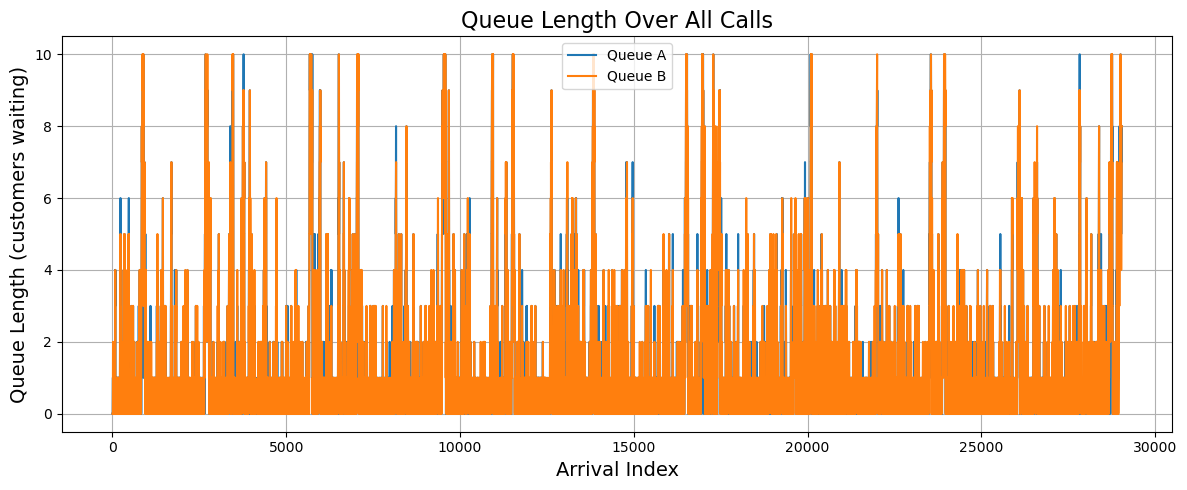

In [21]:
# Use your actual number of arrivals if mirroring the dataset:
num_arrivals = len(df_clean)  # e.g., 29041

sim_df, summary, q_trace_df = simulate(
    num_arrivals=num_arrivals,
    start_time=0.0,
    queue_limit=QUEUE_LIMIT,  # 10
    cA=3, cB=3,               # 3 parallel servers per group (adjust if needed)
    seed=42
)

fcfs_print_summary(SERVICE_rate_A, SERVICE_rate_B, summary)
plot_queue_trace(q_trace_df)


## Q-learning


Training summary (tail):
 episode  epsilon  total_reward  assigned  dropped  avg_wait_seconds
    2996     0.01 -4.495900e+06     28471      570        145.899319
    2997     0.01 -4.485579e+06     28602      439        147.618317
    2998     0.01 -5.171189e+06     28378      663        168.207367
    2999     0.01 -4.471117e+06     28543      498        146.176525
    3000     0.01 -4.420940e+06     28492      549        143.603100


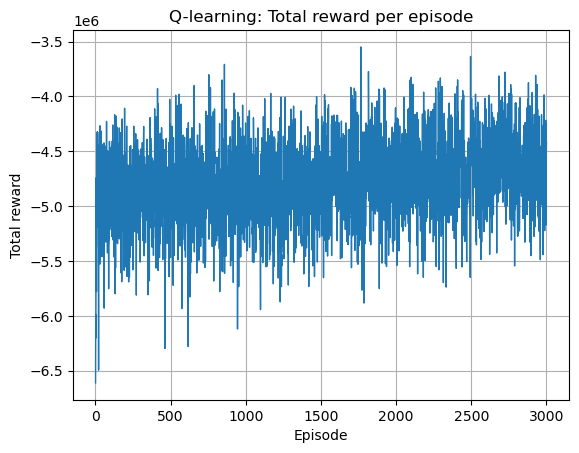

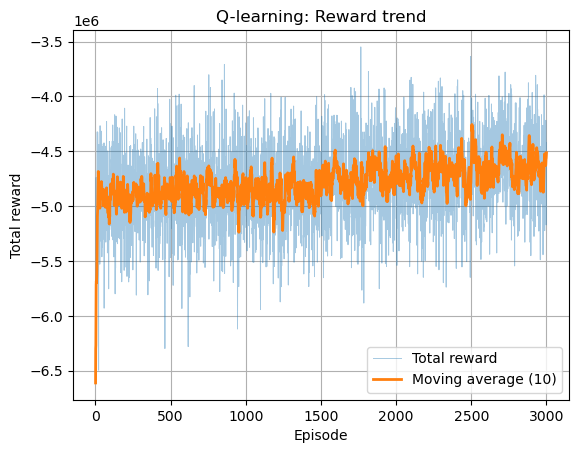

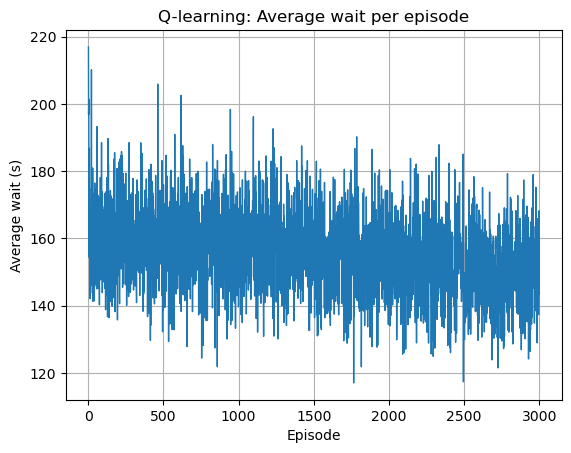

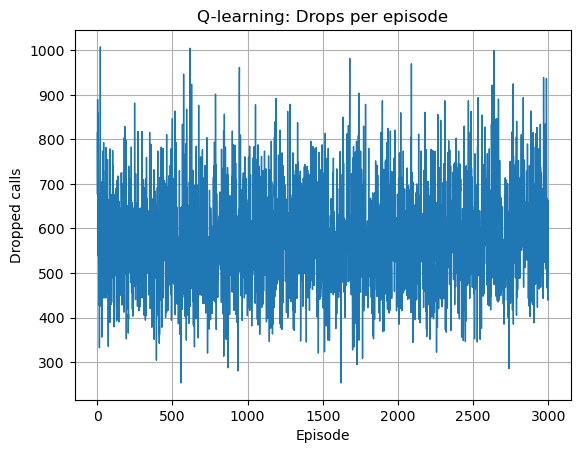


FCFS baseline: {'total_reward': -5001955.732318431, 'assigned': 28694, 'dropped': 347, 'avg_wait_seconds': 167.064742884172}


In [22]:
# ============================================
# Q-learning for Call Center (A/B) with:
# - Log-normal interarrivals (within-day, 06:00–23:59)
# - Log-normal service times per (Group A/B, Type PS/Non-PS)
# - c=3 parallel servers per group (M/G/c), FCFS per queue
# - Epsilon decay & tracking
# ============================================

import pandas as pd
import numpy as np
import random
from collections import deque, defaultdict
from heapq import heappush, heappop
import matplotlib.pyplot as plt

# ---------------------------
# 0) Reproducibility
# ---------------------------
np.random.seed(42)
random.seed(42)

# ---------------------------
# 1) Configuration (EDIT HERE)
# ---------------------------
CSV_PATH = "cleaned_july1999.csv"

ARRIVAL_COL = "vru_entry"      # arrival timestamps
SERVICE_COL = "ser_time"       # raw service seconds
SHIFT_SERVICE_COL = "shift_service_time"  # preferred service seconds
TYPE_COL = "type"              # 'PS' vs Non-PS codes
GROUP_COL = "group"            # 'A' vs 'B'
PS_LABEL = "PS"
NON_PS_SET = {'NW','NE','PE','TT','IN'}

QUEUE_LIMIT = 10               # waiting capacity per group (not counting in-service)
C_A, C_B = 3, 3                # parallel servers per group (set to 1 for single server)

# Q-learning hyperparams
EPISODES = 3000
ALPHA = 0.2
GAMMA = 0.9
EPSILON_START, EPSILON_END = 0.15, 0.01
DECAY_EPISODES = int(0.9 * EPISODES)

# Rewards
DROP_PENALTY = 600.0
REWARD_WAIT_SCALE = 1.0

# Fixed EDA ratios
RATIO_PS = 0.7352
RATIO_NON_PS = 1 - RATIO_PS  # 0.2648

# ---------------------------
# 2) Load & prepare data
# ---------------------------
df_raw = pd.read_csv(CSV_PATH, parse_dates=[ARRIVAL_COL])
df_raw = df_raw.sort_values(ARRIVAL_COL).reset_index(drop=True)

# Prefer shift_service_time if present; else fallback to ser_time
if SHIFT_SERVICE_COL in df_raw.columns:
    df_raw['service_used'] = pd.to_numeric(df_raw[SHIFT_SERVICE_COL], errors='coerce')
else:
    df_raw['service_used'] = pd.to_numeric(df_raw[SERVICE_COL], errors='coerce')

# Keep columns we need
need_cols = [ARRIVAL_COL, 'service_used', TYPE_COL, GROUP_COL]
df_use = df_raw[need_cols].copy()
df_use['type_std'] = np.where(df_use[TYPE_COL] == PS_LABEL, 'PS',
                       np.where(df_use[TYPE_COL].isin(NON_PS_SET), 'Non-PS', 'Non-PS'))
df_use = df_use.dropna(subset=[ARRIVAL_COL, 'service_used'])

# ---------------------------
# 3) Interarrival: log-normal fit (within-day, 06–23)
# ---------------------------
df_i = df_use[[ARRIVAL_COL]].copy().dropna()
df_i['hour'] = df_i[ARRIVAL_COL].dt.hour
df_i = df_i[df_i['hour'].between(6, 23)]
df_i['day']  = df_i[ARRIVAL_COL].dt.date
interarrival_sec = (df_i.groupby('day')[ARRIVAL_COL]
                      .diff()
                      .dt.total_seconds()
                      .dropna())
interarrival_sec = interarrival_sec[interarrival_sec > 0]

log_ia = np.log(interarrival_sec.values)
IA_MU, IA_SIGMA = log_ia.mean(), log_ia.std(ddof=1)

def sample_interarrival_seconds():
    return float(np.random.lognormal(mean=IA_MU, sigma=IA_SIGMA))

# ---------------------------
# 4) Service: log-normal per (group, type)
# ---------------------------
def fit_lognormal_params(x):
    x = np.asarray(x, dtype=float)
    x = x[np.isfinite(x) & (x > 0)]
    if x.size == 0:
        return np.nan, np.nan, np.nan
    logx = np.log(x)
    mu = float(np.mean(logx))
    sigma = float(np.std(logx, ddof=1))
    mean_seconds = float(np.exp(mu + 0.5 * sigma**2))
    return mu, sigma, mean_seconds

SERVICE_LN_PARAMS = {}  # {(g,t): {mu, sigma, mean_sec, n}}
for g in ['A','B']:
    for t in ['PS','Non-PS']:
        mask = (df_use[GROUP_COL]==g) & (df_use['type_std']==t)
        mu, sigma, mean_sec = fit_lognormal_params(df_use.loc[mask, 'service_used'])
        SERVICE_LN_PARAMS[(g,t)] = {"mu":mu, "sigma":sigma, "mean_sec":mean_sec, "n": int(mask.sum())}

def sample_service_seconds_lognorm(group_label, call_type):
    p = SERVICE_LN_PARAMS.get((group_label, call_type))
    if (p is None) or (not np.isfinite(p['mu'])) or (not np.isfinite(p['sigma'])):
        # fallback to any available cell
        for v in SERVICE_LN_PARAMS.values():
            if np.isfinite(v['mu']) and np.isfinite(v['sigma']):
                p = v; break
    return float(np.random.lognormal(mean=p['mu'], sigma=p['sigma']))

def sample_call_type():
    return 'PS' if (random.random() < RATIO_PS) else 'Non-PS'

# ---------------------------
# 5) Group mechanics (M/G/c)
# ---------------------------
class GroupQueue:
    """One group (A or B): c servers + FCFS waiting queue with capacity QUEUE_LIMIT."""
    def __init__(self, name, c_servers, capacity):
        self.name = name
        self.c = int(c_servers)
        self.capacity = int(capacity)
        self.heap = []          # min-heap of service end times for in-service jobs
        self.wait_q = deque()   # queue of service durations waiting (seconds)

    def free_finished(self, now):
        while self.heap and self.heap[0] <= now:
            heappop(self.heap)

    def can_start_now(self):
        return len(self.heap) < self.c

    def start_now(self, now, svc_seconds):
        """Start immediately; returns (end_time)."""
        end = now + svc_seconds
        heappush(self.heap, end)
        return end

    def queue_len(self):
        return len(self.wait_q)

    def expected_wait_if_enqueued(self, now, svc_seconds):
        """
        Approximate wait = time until a server becomes free after we
        'place' all current waiting jobs ahead of this one.
        We simulate on a copy of the heap by sequentially assigning queued jobs.
        """
        # Copy current finishing times (in-service)
        sim_heap = list(self.heap)
        # Fill up with idle servers finishing at 'now'
        while len(sim_heap) < self.c:
            heappush(sim_heap, now)
        # Place all current queued jobs
        for q_svc in self.wait_q:
            t_free = heappop(sim_heap)
            heappush(sim_heap, t_free + q_svc)
        # After placing all queued jobs, the earliest free time is the start for our new job
        start_time = heappop(sim_heap)
        wait = max(0.0, start_time - now)
        return wait

    def enqueue(self, svc_seconds):
        """Put job at the tail (if capacity allows)."""
        if self.queue_len() >= self.capacity:
            return False
        self.wait_q.append(svc_seconds)
        return True

    def try_pull_from_queue(self, now):
        """If servers are free at 'now', start as many queued jobs as possible."""
        started = 0
        while self.can_start_now() and self.wait_q:
            q_svc = self.wait_q.popleft()
            self.start_now(now, q_svc)
            started += 1
        return started

# ---------------------------
# 6) RL State & Policy
# ---------------------------
# State = (#in-service + #waiting) for A and B (capped for stability)
MAX_STATE_PER_GROUP = QUEUE_LIMIT + 3  # c + queue; cap to avoid state explosion

def state_tuple(now, gA: GroupQueue, gB: GroupQueue):
    sA = min(MAX_STATE_PER_GROUP, len(gA.heap) + gA.queue_len())
    sB = min(MAX_STATE_PER_GROUP, len(gB.heap) + gB.queue_len())
    return (sA, sB)

Q = defaultdict(lambda: {0: 0.0, 1: 0.0})  # action 0->A, 1->B

def epsilon_for_episode(ep):
    if ep >= DECAY_EPISODES: return EPSILON_END
    return EPSILON_START - (EPSILON_START - EPSILON_END) * (ep / DECAY_EPISODES)

def epsilon_greedy_action(state, epsilon):
    if np.random.random() < epsilon:
        return np.random.randint(0, 2)
    qA, qB = Q[state][0], Q[state][1]
    return 0 if qA >= qB else 1

# ---------------------------
# 7) One episode
# ---------------------------
def run_episode(epsilon):
    now = 0.0
    gA = GroupQueue('A', C_A, QUEUE_LIMIT)
    gB = GroupQueue('B', C_B, QUEUE_LIMIT)

    next_arrival = now + sample_interarrival_seconds()

    total_reward = 0.0
    total_wait = 0.0
    assigned = 0
    dropped  = 0

    N_ARRIVALS = len(df_use)  # match dataset scale

    for _ in range(N_ARRIVALS):
        t = float(next_arrival)

        # complete work up to t & start queued if possible at t
        for g in (gA, gB):
            g.free_finished(t)
            g.try_pull_from_queue(t)

        s = state_tuple(t, gA, gB)

        call_type = sample_call_type()
        action = epsilon_greedy_action(s, epsilon)
        grp = gA if action == 0 else gB
        svc = sample_service_seconds_lognorm(grp.name, call_type)

        # Try immediate start or enqueue/drop with expected wait estimate
        if grp.can_start_now():
            grp.start_now(t, svc)
            reward = -0.0
            total_wait += 0.0
            assigned += 1
        else:
            # enqueue if space; estimate wait using current heap & queue
            if grp.queue_len() < grp.capacity:
                est_wait = grp.expected_wait_if_enqueued(t, svc)
                grp.enqueue(svc)
                reward = -REWARD_WAIT_SCALE * est_wait
                total_wait += est_wait
                assigned += 1
            else:
                # drop
                reward = -DROP_PENALTY
                dropped += 1

        total_reward += reward

        s_next = state_tuple(t, gA, gB)
        best_next = max(Q[s_next][0], Q[s_next][1])
        td_target = reward + GAMMA * best_next
        Q[s][action] += ALPHA * (td_target - Q[s][action])

        next_arrival = t + sample_interarrival_seconds()

    avg_wait = (total_wait / assigned) if assigned > 0 else float('inf')
    return {"total_reward": total_reward, "assigned": assigned,
            "dropped": dropped, "avg_wait_seconds": avg_wait}

# ---------------------------
# 8) Train with epsilon decay
# ---------------------------
episode_stats = []
for ep in range(1, EPISODES + 1):
    eps = epsilon_for_episode(ep)
    stats = run_episode(eps)
    episode_stats.append({
        "episode": ep,
        "epsilon": eps,
        "total_reward": stats["total_reward"],
        "assigned": stats["assigned"],
        "dropped": stats["dropped"],
        "avg_wait_seconds": stats["avg_wait_seconds"]
    })

stats_df = pd.DataFrame(episode_stats)
print("\nTraining summary (tail):")
print(stats_df.tail().to_string(index=False))

# ---------------------------
# 9) Tracking plots
# ---------------------------
plt.figure()
plt.plot(stats_df["episode"], stats_df["total_reward"], lw=1)
plt.xlabel("Episode"); plt.ylabel("Total reward")
plt.title("Q-learning: Total reward per episode"); plt.grid(True); plt.show()

window = 10
stats_df["reward_ma"] = stats_df["total_reward"].rolling(window=window, min_periods=1).mean()
plt.figure()
plt.plot(stats_df["episode"], stats_df["total_reward"], lw=0.7, alpha=0.4, label="Total reward")
plt.plot(stats_df["episode"], stats_df["reward_ma"], lw=2, label=f"Moving average ({window})")
plt.xlabel("Episode"); plt.ylabel("Total reward")
plt.title("Q-learning: Reward trend"); plt.legend(); plt.grid(True); plt.show()

plt.figure()
plt.plot(stats_df["episode"], stats_df["avg_wait_seconds"], lw=1)
plt.xlabel("Episode"); plt.ylabel("Average wait (s)")
plt.title("Q-learning: Average wait per episode"); plt.grid(True); plt.show()

plt.figure()
plt.plot(stats_df["episode"], stats_df["dropped"], lw=1)
plt.xlabel("Episode"); plt.ylabel("Dropped calls")
plt.title("Q-learning: Drops per episode"); plt.grid(True); plt.show()

# ---------------------------
# 10) FCFS baseline (same mechanics)
# ---------------------------
def run_episode_fcfs():
    now = 0.0
    gA = GroupQueue('A', C_A, QUEUE_LIMIT)
    gB = GroupQueue('B', C_B, QUEUE_LIMIT)
    next_arrival = now + sample_interarrival_seconds()

    total_wait = 0.0
    assigned = 0
    dropped  = 0

    N_ARRIVALS = len(df_use)

    for _ in range(N_ARRIVALS):
        t = float(next_arrival)
        for g in (gA, gB):
            g.free_finished(t)
            g.try_pull_from_queue(t)

        # FCFS routing: choose the shorter (in-service + waiting) load; tie-break random
        sA, sB = state_tuple(t, gA, gB)
        grp = gA if (sA < sB or (sA == sB and random.random() < 0.5)) else gB

        call_type = sample_call_type()
        svc = sample_service_seconds_lognorm(grp.name, call_type)

        if grp.can_start_now():
            grp.start_now(t, svc)
            assigned += 1
        else:
            if grp.queue_len() < grp.capacity:
                est_wait = grp.expected_wait_if_enqueued(t, svc)
                grp.enqueue(svc)
                total_wait += est_wait
                assigned += 1
            else:
                dropped += 1

        next_arrival = t + sample_interarrival_seconds()

    avg_wait = (total_wait / assigned) if assigned > 0 else float('inf')
    # For a like-for-like "reward", use the same negative wait and drop penalties
    total_reward = -REWARD_WAIT_SCALE * total_wait - DROP_PENALTY * dropped
    return {"total_reward": total_reward, "assigned": assigned,
            "dropped": dropped, "avg_wait_seconds": avg_wait}

fcfs_stats = run_episode_fcfs()
print("\nFCFS baseline:", fcfs_stats)



=== Performance Comparison ===
             Policy  Avg wait (s)   Util A   Util B  Avg Qlen A  Avg Qlen B  Drop rate (%)  Served  Dropped
    FCFS (baseline)     82.823541 0.634750 0.645238    0.718617    0.706248       0.457716   18268       84
Q-learning (greedy)     79.886612 0.656943 0.593551    0.549066    0.813899       0.842636   18475      157


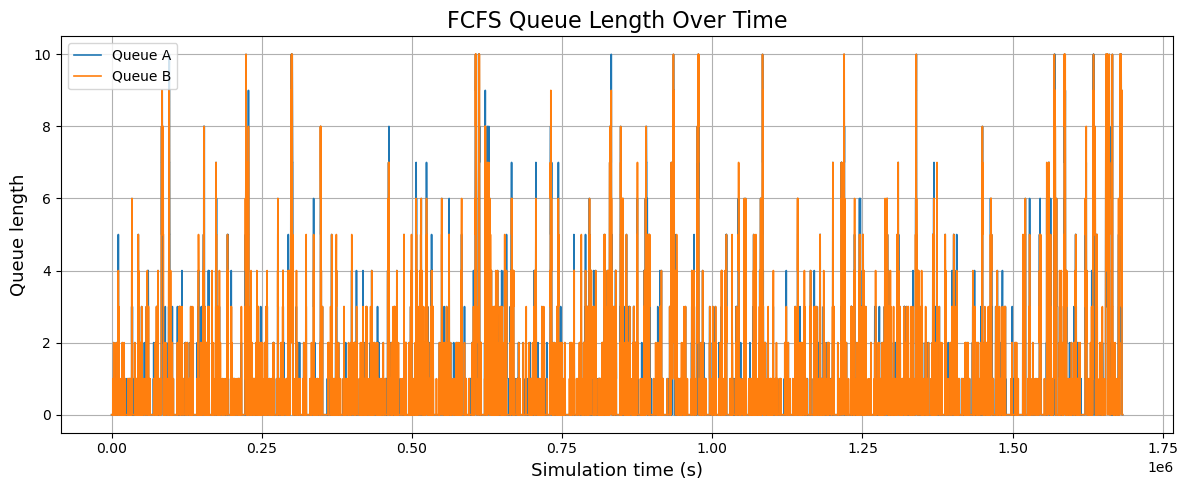

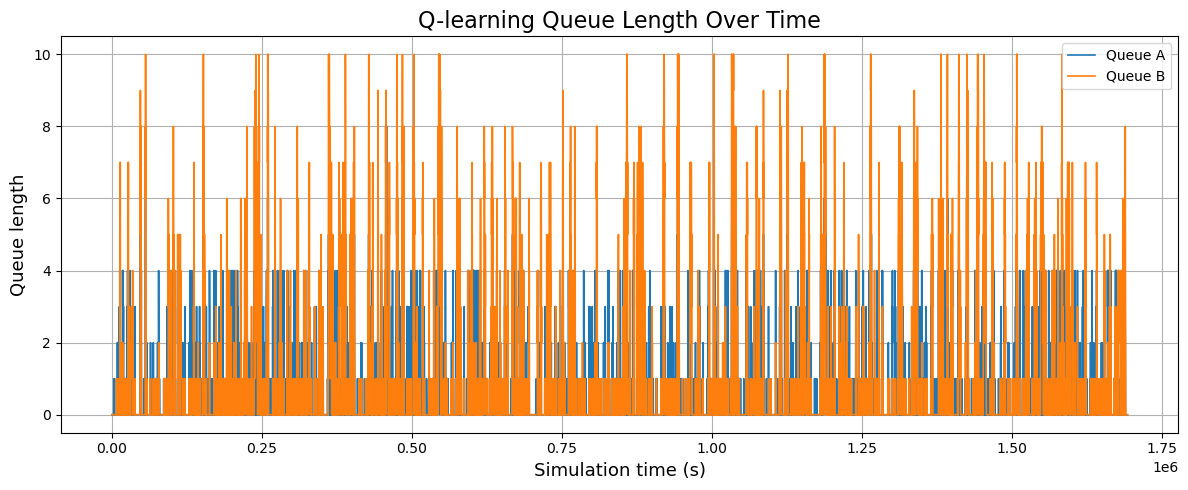

In [25]:
# ============================================
# Q-learning vs FCFS: Comparison Table, Queue-Length Plots, Policy Heatmaps
# - Interarrivals: log-normal within-day (06:00–23:59)
# - Service: log-normal per (Group A/B, Type PS/Non-PS) using shift_service_time if present
# - Two groups with c=3 parallel servers, FCFS per group
# - Outputs:
#   * Comparison table (Avg wait, Util A/B, Avg queue A/B, Drop rate, Served, Dropped)
#   * Queue length plots over the full simulation for FCFS and Q-learning
#   * Policy heatmaps for FCFS and the learned Q-policy
# ============================================

import pandas as pd
import numpy as np
import random
from collections import deque, defaultdict
from heapq import heappush, heappop
import matplotlib.pyplot as plt

# ---------------------------
# 0) Reproducibility
# ---------------------------
np.random.seed(42)
random.seed(42)

# ---------------------------
# 1) Configuration (EDIT HERE)
# ---------------------------
CSV_PATH = "cleaned_july1999.csv"

ARRIVAL_COL = "vru_entry"        # arrival timestamps
SERVICE_COL = "ser_time"         # raw service seconds
SHIFT_SERVICE_COL = "shift_service_time"  # preferred service seconds (already in df if you added it)
TYPE_COL = "type"                # 'PS' vs Non-PS codes
GROUP_COL = "group"              # 'A' vs 'B'
PS_LABEL = "PS"
NON_PS_SET = {'NW','NE','PE','TT','IN'}

QUEUE_LIMIT = 10                 # waiting capacity per group (not counting in-service)
C_A, C_B = 3, 3                  # parallel servers per group (set to 1 for single server)

# Q-learning hyperparams
EPISODES = 2000
ALPHA = 0.2
GAMMA = 0.9
EPSILON_START, EPSILON_END = 0.15, 0.01
DECAY_EPISODES = int(0.9 * EPISODES)

# Rewards (training only)
DROP_PENALTY = 600.0
REWARD_WAIT_SCALE = 1.0

# Fixed EDA type ratios
RATIO_PS = 0.7352
RATIO_NON_PS = 1 - RATIO_PS  # 0.2648

# ---------------------------
# 2) Load & prepare data
# ---------------------------
df_raw = pd.read_csv(CSV_PATH, parse_dates=[ARRIVAL_COL])
df_raw = df_raw.sort_values(ARRIVAL_COL).reset_index(drop=True)

# Prefer shift_service_time if present; else fallback to ser_time
if SHIFT_SERVICE_COL in df_raw.columns:
    df_raw['service_used'] = pd.to_numeric(df_raw[SHIFT_SERVICE_COL], errors='coerce')
else:
    df_raw['service_used'] = pd.to_numeric(df_raw[SERVICE_COL], errors='coerce')

# Standardize call type to {'PS','Non-PS'}
df_raw['type_std'] = np.where(df_raw[TYPE_COL] == PS_LABEL, 'PS',
                       np.where(df_raw[TYPE_COL].isin(NON_PS_SET), 'Non-PS', 'Non-PS'))

df_use = df_raw[[ARRIVAL_COL, 'service_used', 'type_std', GROUP_COL]].dropna(subset=[ARRIVAL_COL])

# ---------------------------
# 3) Interarrival: log-normal fit (within-day, 06–23)
# ---------------------------
df_i = df_use[[ARRIVAL_COL]].copy().dropna()
df_i['hour'] = df_i[ARRIVAL_COL].dt.hour
df_i = df_i[df_i['hour'].between(6, 23)]
df_i['day']  = df_i[ARRIVAL_COL].dt.date
interarrival_sec = (df_i.groupby('day')[ARRIVAL_COL]
                      .diff()
                      .dt.total_seconds()
                      .dropna())
interarrival_sec = interarrival_sec[interarrival_sec > 0]

log_ia = np.log(interarrival_sec.values)
IA_MU, IA_SIGMA = log_ia.mean(), log_ia.std(ddof=1)

def sample_interarrival_seconds():
    return float(np.random.lognormal(mean=IA_MU, sigma=IA_SIGMA))

# ---------------------------
# 4) Service: log-normal per (group, type)
# ---------------------------
def fit_lognormal_params(x):
    x = np.asarray(pd.to_numeric(x, errors='coerce'), dtype=float)
    x = x[np.isfinite(x) & (x > 0)]
    if x.size == 0:
        return np.nan, np.nan, np.nan
    logx = np.log(x)
    mu = float(np.mean(logx))
    sigma = float(np.std(logx, ddof=1))
    mean_seconds = float(np.exp(mu + 0.5 * sigma**2))
    return mu, sigma, mean_seconds

SERVICE_LN_PARAMS = {}  # {(g,t): {mu, sigma, mean_sec, n}}
for g in ['A','B']:
    for t in ['PS','Non-PS']:
        mask = (df_use[GROUP_COL]==g) & (df_use['type_std']==t)
        mu, sigma, mean_sec = fit_lognormal_params(df_use.loc[mask, 'service_used'])
        SERVICE_LN_PARAMS[(g,t)] = {"mu":mu, "sigma":sigma, "mean_sec":mean_sec, "n": int(mask.sum())}

def sample_service_seconds_lognorm(group_label, call_type):
    p = SERVICE_LN_PARAMS.get((group_label, call_type))
    if (p is None) or (not np.isfinite(p['mu'])) or (not np.isfinite(p['sigma'])):
        # fallback to any available cell
        for v in SERVICE_LN_PARAMS.values():
            if np.isfinite(v['mu']) and np.isfinite(v['sigma']):
                p = v; break
    return float(np.random.lognormal(mean=p['mu'], sigma=p['sigma']))

def sample_call_type():
    return 'PS' if (random.random() < RATIO_PS) else 'Non-PS'

# ---------------------------
# 5) Group mechanics (M/G/c)
# ---------------------------
class GroupQueue:
    """One group (A or B): c servers + FCFS waiting queue with capacity QUEUE_LIMIT."""
    def __init__(self, name, c_servers, capacity):
        self.name = name
        self.c = int(c_servers)
        self.capacity = int(capacity)
        self.heap = []          # min-heap of service end times for in-service jobs
        self.wait_q = deque()   # queue of (arrival_time, service duration)
        # For metrics
        self.busy_time_sum = 0.0      # time-integral of number-in-service
        self.queue_time_sum = 0.0     # time-integral of queue length
        self.last_t = 0.0
        self.service_work_sum = 0.0   # sum of service durations of served jobs (for sanity)
        self.queue_len_trace = []     # (time, qlen)

    def update_time_integrals(self, now):
        dt = now - self.last_t
        if dt > 0:
            self.busy_time_sum  += dt * len(self.heap)
            self.queue_time_sum += dt * len(self.wait_q)
            self.last_t = now

    def free_finished(self, now):
        while self.heap and self.heap[0] <= now:
            heappop(self.heap)

    def can_start_now(self):
        return len(self.heap) < self.c

    def start_now(self, now, svc_seconds):
        """Start immediately; returns (end_time)."""
        end = now + svc_seconds
        heappush(self.heap, end)
        self.service_work_sum += svc_seconds
        return end

    def queue_len(self):
        return len(self.wait_q)

    def enqueue(self, arrival_time, svc_seconds):
        if self.queue_len() >= self.capacity:
            return False
        self.wait_q.append((arrival_time, svc_seconds))
        return True

    def try_pull_from_queue(self, now, records_list):
        """If servers are free at 'now', start as many queued jobs as possible."""
        started = 0
        while self.can_start_now() and self.wait_q:
            arr_t, q_svc = self.wait_q.popleft()
            wait = max(0.0, now - arr_t)
            end = self.start_now(now, q_svc)
            records_list.append({
                'group': self.name, 'time_arrival': arr_t, 'time_start': now,
                'time_end': end, 'wait': wait, 'service_time': q_svc, 'dropped': False
            })
            started += 1
        return started

# ---------------------------
# 6) RL State & Policy
# ---------------------------
MAX_STATE_PER_GROUP = QUEUE_LIMIT + max(C_A, C_B)  # cap to avoid state explosion

def state_tuple(gA: GroupQueue, gB: GroupQueue):
    sA = min(MAX_STATE_PER_GROUP, len(gA.heap) + gA.queue_len())
    sB = min(MAX_STATE_PER_GROUP, len(gB.heap) + gB.queue_len())
    return (sA, sB)

Q = defaultdict(lambda: {0: 0.0, 1: 0.0})  # action 0->A, 1->B

def epsilon_for_episode(ep):
    if ep >= DECAY_EPISODES: return EPSILON_END
    return EPSILON_START - (EPSILON_START - EPSILON_END) * (ep / DECAY_EPISODES)

def epsilon_greedy_action(state, epsilon):
    if np.random.random() < epsilon:
        return np.random.randint(0, 2)
    qA, qB = Q[state][0], Q[state][1]
    return 0 if qA >= qB else 1

# ---------------------------
# 7) Training episode (arrival-driven; efficient)
# ---------------------------
def run_episode_train(epsilon):
    now = 0.0
    gA = GroupQueue('A', C_A, QUEUE_LIMIT)
    gB = GroupQueue('B', C_B, QUEUE_LIMIT)
    next_arrival = now + sample_interarrival_seconds()

    total_reward = 0.0
    total_wait = 0.0
    assigned = 0
    dropped  = 0

    N_ARRIVALS = len(df_use)  # match dataset scale

    for _ in range(N_ARRIVALS):
        t = float(next_arrival)

        # advance time integrals to t (pre-change state)
        gA.update_time_integrals(t); gB.update_time_integrals(t)

        # complete work up to t & start queued at t
        gA.free_finished(t); gB.free_finished(t)
        gA.try_pull_from_queue(t, records_list=[]); gB.try_pull_from_queue(t, records_list=[])

        s = state_tuple(gA, gB)

        call_type = sample_call_type()
        action = epsilon_greedy_action(s, epsilon)
        grp = gA if action == 0 else gB
        svc = sample_service_seconds_lognorm(grp.name, call_type)

        if grp.can_start_now():
            grp.start_now(t, svc)
            reward = -0.0
            assigned += 1
        else:
            if grp.queue_len() < grp.capacity:
                # approximate wait: how long until any server is free plus existing queue
                # (lightweight proxy for training; evaluation is event-driven)
                head_finish = min(grp.heap) if grp.heap else t
                est_wait = max(0.0, head_finish - t) + sum(s for _, s in grp.wait_q)
                grp.enqueue(t, svc)
                reward = -REWARD_WAIT_SCALE * est_wait
                total_wait += est_wait
                assigned += 1
            else:
                reward = -DROP_PENALTY
                dropped += 1

        total_reward += reward

        s_next = state_tuple(gA, gB)
        best_next = max(Q[s_next][0], Q[s_next][1])
        td_target = reward + GAMMA * best_next
        Q[s][action] += ALPHA * (td_target - Q[s][action])

        # schedule next arrival
        next_arrival = t + sample_interarrival_seconds()

    avg_wait = (total_wait / assigned) if assigned > 0 else float('inf')
    return {"total_reward": total_reward, "assigned": assigned,
            "dropped": dropped, "avg_wait_seconds": avg_wait}

# ---------------------------
# 8) Train
# ---------------------------
episode_stats = []
for ep in range(1, EPISODES + 1):
    eps = epsilon_for_episode(ep)
    stats = run_episode_train(eps)
    episode_stats.append({
        "episode": ep,
        "epsilon": eps,
        "total_reward": stats["total_reward"],
        "assigned": stats["assigned"],
        "dropped": stats["dropped"],
        "avg_wait_seconds": stats["avg_wait_seconds"]
    })
stats_df = pd.DataFrame(episode_stats)

# ---------------------------
# 9) Event-driven simulator for evaluation (FCFS / Q-greedy)
# ---------------------------
def simulate_event_driven(policy_name="fcfs"):
    """
    policy_name: 'fcfs' or 'q'
    Returns: metrics dict, records df, queue length traces for A and B
    """
    now = 0.0
    gA = GroupQueue('A', C_A, QUEUE_LIMIT)
    gB = GroupQueue('B', C_B, QUEUE_LIMIT)

    records = []
    drops = 0
    served = 0
    total_wait = 0.0

    N_ARRIVALS = len(df_use)
    arrivals_done = 0
    next_arrival = now + sample_interarrival_seconds()

    def next_completion():
        opts = []
        if gA.heap: opts.append(gA.heap[0])
        if gB.heap: opts.append(gB.heap[0])
        return min(opts) if opts else np.inf

    # Initialize traces
    gA.queue_len_trace.append((0.0, 0))
    gB.queue_len_trace.append((0.0, 0))

    while arrivals_done < N_ARRIVALS or gA.heap or gA.wait_q or gB.heap or gB.wait_q:
        t_comp = next_completion()

        # Decide next event type
        if arrivals_done < N_ARRIVALS and next_arrival <= t_comp:
            # ARRIVAL EVENT at time 'next_arrival'
            t = float(next_arrival)

            # update time integrals with pre-change state
            gA.update_time_integrals(t); gB.update_time_integrals(t)

            # complete work up to t; start queued jobs at t
            gA.free_finished(t); gB.free_finished(t)
            gA.try_pull_from_queue(t, records); gB.try_pull_from_queue(t, records)

            # record queue length AFTER pulling queued at this t
            gA.queue_len_trace.append((t, gA.queue_len()))
            gB.queue_len_trace.append((t, gB.queue_len()))

            # choose action
            sA = len(gA.heap) + gA.queue_len()
            sB = len(gB.heap) + gB.queue_len()
            if policy_name == 'fcfs':
                if sA < sB:
                    chosen = 'A'
                elif sB < sA:
                    chosen = 'B'
                else:
                    chosen = 'A' if random.random() < 0.5 else 'B'
            else:
                # Q-greedy
                s = (min(MAX_STATE_PER_GROUP, sA), min(MAX_STATE_PER_GROUP, sB))
                action = 0 if Q[s][0] >= Q[s][1] else 1
                chosen = 'A' if action == 0 else 'B'

            call_type = sample_call_type()
            svc = sample_service_seconds_lognorm(chosen, call_type)
            grp = gA if chosen == 'A' else gB

            if grp.can_start_now():
                end = grp.start_now(t, svc)
                records.append({
                    'group': chosen, 'time_arrival': t, 'time_start': t,
                    'time_end': end, 'wait': 0.0, 'service_time': svc, 'dropped': False
                })
                served += 1
            else:
                if grp.queue_len() < grp.capacity:
                    grp.enqueue(t, svc)
                    # actual wait will be recorded when it starts from queue
                else:
                    drops += 1
                    records.append({
                        'group': chosen, 'time_arrival': t, 'time_start': np.nan,
                        'time_end': np.nan, 'wait': np.nan, 'service_time': np.nan, 'dropped': True
                    })

            # schedule next arrival
            next_arrival = t + sample_interarrival_seconds()
            arrivals_done += 1

        else:
            # COMPLETION EVENT at time 't_comp'
            t = float(t_comp)

            # update integrals with pre-change state
            gA.update_time_integrals(t); gB.update_time_integrals(t)

            # free finished(s) and immediately start queued if possible
            gA.free_finished(t); gB.free_finished(t)
            gA.try_pull_from_queue(t, records); gB.try_pull_from_queue(t, records)

            # record queue lengths after completions at t
            gA.queue_len_trace.append((t, gA.queue_len()))
            gB.queue_len_trace.append((t, gB.queue_len()))

    # finalize metrics
    rec_df = pd.DataFrame(records)
    served_mask = ~rec_df['dropped']
    total_wait = float(rec_df.loc[served_mask, 'wait'].sum())
    avg_wait = float(rec_df.loc[served_mask, 'wait'].mean()) if served_mask.any() else float('nan')

    t_end = 0.0
    if not rec_df.empty:
        t_end = max(rec_df['time_end'].max(skipna=True), rec_df['time_arrival'].max())
        t_end = float(t_end)

    # Utilization: time-average number in service / c
    util_A = (gA.busy_time_sum / (t_end * gA.c)) if t_end > 0 else 0.0
    util_B = (gB.busy_time_sum / (t_end * gB.c)) if t_end > 0 else 0.0

    # Average queue length: time-weighted
    avg_q_A = (gA.queue_time_sum / t_end) if t_end > 0 else 0.0
    avg_q_B = (gB.queue_time_sum / t_end) if t_end > 0 else 0.0

    # Drop rate
    total_events = len(rec_df)
    dropped = int((rec_df['dropped']).sum()) if total_events else 0
    drop_rate = (dropped / (served + dropped)) if (served + dropped) > 0 else 0.0

    metrics = {
        "avg_wait_s": avg_wait,
        "util_A": util_A,
        "util_B": util_B,
        "avg_q_A": avg_q_A,
        "avg_q_B": avg_q_B,
        "served": int(served),
        "dropped": int(drops),
        "drop_rate": drop_rate,
        "t_end": t_end
    }
    return metrics, rec_df, gA.queue_len_trace, gB.queue_len_trace

# ---------------------------
# 10) Evaluate FCFS and Q-greedy
# ---------------------------
# FCFS evaluation
fcfs_metrics, fcfs_records, fcfs_qA, fcfs_qB = simulate_event_driven('fcfs')

# Q-greedy evaluation (use learned Q)
q_metrics, q_records, q_qA, q_qB = simulate_event_driven('q')

# ---------------------------
# 11) Comparison table
# ---------------------------
compare_df = pd.DataFrame([
    {
        "Policy": "FCFS (baseline)",
        "Avg wait (s)": fcfs_metrics["avg_wait_s"],
        "Util A": fcfs_metrics["util_A"],
        "Util B": fcfs_metrics["util_B"],
        "Avg Qlen A": fcfs_metrics["avg_q_A"],
        "Avg Qlen B": fcfs_metrics["avg_q_B"],
        "Drop rate (%)": fcfs_metrics["drop_rate"] * 100,
        "Served": fcfs_metrics["served"],
        "Dropped": fcfs_metrics["dropped"],
    },
    {
        "Policy": "Q-learning (greedy)",
        "Avg wait (s)": q_metrics["avg_wait_s"],
        "Util A": q_metrics["util_A"],
        "Util B": q_metrics["util_B"],
        "Avg Qlen A": q_metrics["avg_q_A"],
        "Avg Qlen B": q_metrics["avg_q_B"],
        "Drop rate (%)": q_metrics["drop_rate"] * 100,
        "Served": q_metrics["served"],
        "Dropped": q_metrics["dropped"],
    }
])

print("\n=== Performance Comparison ===")
print(compare_df.to_string(index=False))

# ---------------------------
# 12) Queue length plots (entire dataset horizon)
# ---------------------------
def plot_queue_trace(title, trace_A, trace_B):
    tA, qA = zip(*trace_A)
    tB, qB = zip(*trace_B)
    plt.figure(figsize=(12, 5))
    plt.plot(tA, qA, label='Queue A', lw=1.2)
    plt.plot(tB, qB, label='Queue B', lw=1.2)
    plt.title(title, fontsize=16)
    plt.xlabel("Simulation time (s)", fontsize=13)
    plt.ylabel("Queue length", fontsize=13)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_queue_trace("FCFS Queue Length Over Time", fcfs_qA, fcfs_qB)
plot_queue_trace("Q-learning Queue Length Over Time", q_qA, q_qB)

# ---------------------------
# 13) Policy heatmaps (FCFS vs Q-learning)
# ---------------------------
S_MAX = MAX_STATE_PER_GROUP  # grid size
# FCFS policy: choose A if sA < sB, B if sB < sA, 0.5 on ties
fcfs_grid = np.full((S_MAX+1, S_MAX+1), 0.5)  # value = prob(route to A)
for sA in range(S_MAX+1):
    for sB in range(S_MAX+1):
        if sA < sB: fcfs_grid[sA, sB] = 1.0
        elif sB < sA: fcfs_grid[sA, sB] = 0.0
        else: fcfs_grid[sA, sB] = 0.5

# Q-learning greedy policy heatmap: prob(route to A) inferred from Q
q_grid = np.full((S_MAX+1, S_MAX+1), np.nan)
for sA in range(S_MAX+1):
    for sB in range(S_MAX+1):
        s = (sA, sB)
        qA = Q[s][0]
        qB = Q[s][1]
        if qA == 0.0 and qB == 0.0:
            q_grid[sA, sB] = 0.5  # unseen/neutral
        else:
            q_grid[sA, sB] = 1.0 if qA >= qB else 0.0




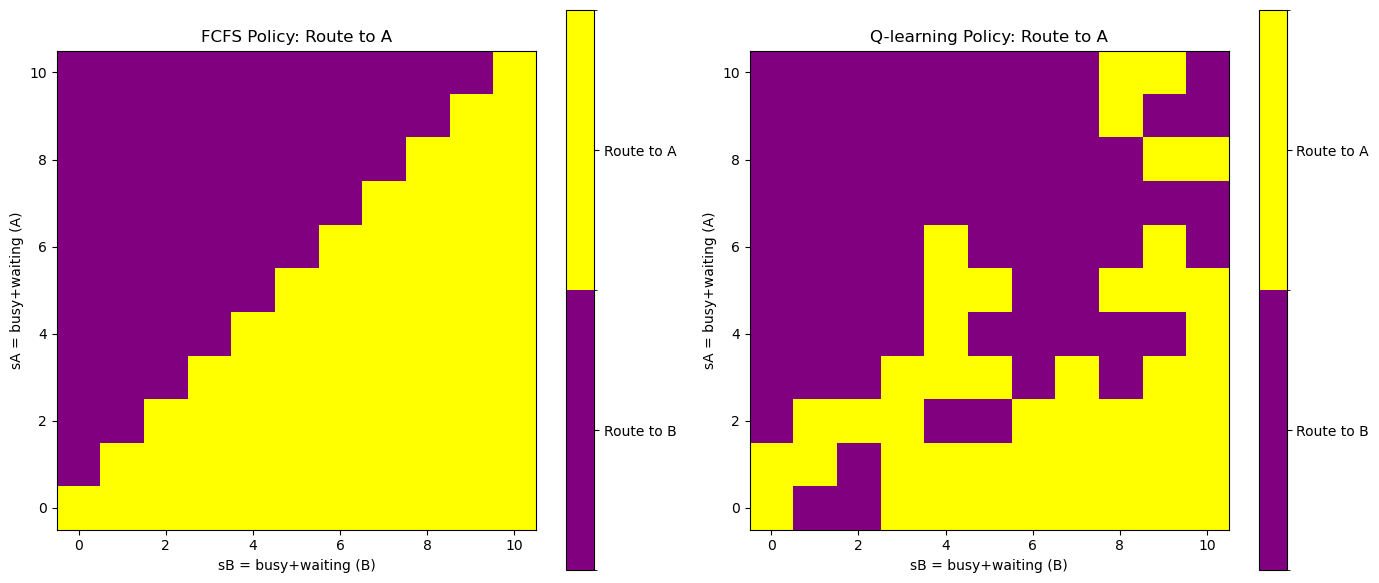

In [28]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

# Binary colormap: purple for B, yellow for A
cmap = ListedColormap(['purple', 'yellow'])
norm = BoundaryNorm([0, 0.5, 1], cmap.N)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# FCFS Policy
im1 = axs[0].imshow(fcfs_policy_grid, origin='lower', cmap=cmap, norm=norm)
axs[0].set_title("FCFS Policy: Route to A")
axs[0].set_xlabel("sB = busy+waiting (B)")
axs[0].set_ylabel("sA = busy+waiting (A)")
cbar1 = fig.colorbar(im1, ax=axs[0], ticks=[0.25, 0.75])
cbar1.ax.set_yticklabels(['Route to B', 'Route to A'])

# Q-learning Policy
im2 = axs[1].imshow(qlearn_policy_grid, origin='lower', cmap=cmap, norm=norm)
axs[1].set_title("Q-learning Policy: Route to A")
axs[1].set_xlabel("sB = busy+waiting (B)")
axs[1].set_ylabel("sA = busy+waiting (A)")
cbar2 = fig.colorbar(im2, ax=axs[1], ticks=[0.25, 0.75])
cbar2.ax.set_yticklabels(['Route to B', 'Route to A'])

plt.tight_layout()
plt.show()
